# Demo of GOLEM-EV

Dataset configurations:
- Ground truth: 20-node ER2 graph
- Data: Linear DAG model with Gaussian-EV noise.

In [5]:
!python3 main.py --method GOLEM \
                     --seed 1 \
                     --d 10 \
                     --graph_type ER \
                     --degree 4 \
                     --noise_type gaussian_ev \
                     --equal_variances \
                     --lambda_1 2e-2 \
                     --lambda_2 5.0 \
                     --checkpoint_iter 5000

No GPU automatically detected. Setting SETTINGS.GPU to 0, and SETTINGS.NJOBS to cpu_count.
2023-12-10 14:29:16,377 INFO - __main__ - Finished setting up the logger.
2023-12-10 14:29:16,379 INFO - __main__ - Finished loading the dataset.
2023-12-10 14:29:16,651 INFO - src.trainers.golem_trainer - Started training for 100000.0 iterations.
2023-12-10 14:29:16,683 INFO - src.trainers.golem_trainer - [Iter 0] score 6.202E+01, likelihood 6.202E+01, h 0.000E+00
2023-12-10 14:29:17,857 INFO - src.trainers.golem_trainer - [Iter 5000] score 4.657E+01, likelihood 4.601E+01, h 7.572E-04
2023-12-10 14:29:19,049 INFO - src.trainers.golem_trainer - [Iter 10000] score 4.657E+01, likelihood 4.600E+01, h 5.894E-04
2023-12-10 14:29:20,248 INFO - src.trainers.golem_trainer - [Iter 15000] score 4.657E+01, likelihood 4.600E+01, h 5.732E-04
2023-12-10 14:29:21,447 INFO - src.trainers.golem_trainer - [Iter 20000] score 4.657E+01, likelihood 4.600E+01, h 5.684E-04
2023-12-10 14:29:22,646 INFO - src.trainers.go

# Demo of GOLEM-NV

The optimization problem of GOLEM-NV is susceptible to local solutions, so we have to initialize it with the solution returned by GOLEM-EV.

Dataset configurations:
- Ground truth: 20-node ER2 graph
- Data: Linear DAG model with Gaussian-NV noise.

In [6]:
!python3 main.py  --method GOLEM \
                     --seed 1 \
                     --d 10 \
                     --graph_type ER \
                     --degree 4 \
                     --noise_type gaussian_nv \
                     --equal_variances \
                     --lambda_1 2e-2 \
                     --lambda_2 5.0 \
                     --checkpoint_iter 5000

No GPU automatically detected. Setting SETTINGS.GPU to 0, and SETTINGS.NJOBS to cpu_count.
2023-12-10 14:29:45,808 INFO - __main__ - Finished setting up the logger.
2023-12-10 14:29:45,810 INFO - __main__ - Finished loading the dataset.
2023-12-10 14:29:46,011 INFO - src.trainers.golem_trainer - Started training for 100000.0 iterations.
2023-12-10 14:29:46,034 INFO - src.trainers.golem_trainer - [Iter 0] score 6.712E+01, likelihood 6.712E+01, h 0.000E+00
2023-12-10 14:29:47,232 INFO - src.trainers.golem_trainer - [Iter 5000] score 5.048E+01, likelihood 4.987E+01, h 6.716E-03
2023-12-10 14:29:48,473 INFO - src.trainers.golem_trainer - [Iter 10000] score 5.048E+01, likelihood 4.987E+01, h 6.376E-03
2023-12-10 14:29:49,706 INFO - src.trainers.golem_trainer - [Iter 15000] score 5.048E+01, likelihood 4.987E+01, h 6.369E-03
2023-12-10 14:29:50,938 INFO - src.trainers.golem_trainer - [Iter 20000] score 5.048E+01, likelihood 4.987E+01, h 6.372E-03
2023-12-10 14:29:52,153 INFO - src.trainers.go

## First way to run GOLEM-NV with initialization

Set `init` to `True`. By default, the code will load the estimated solution of the **latest** experiment (based on datetime) in the `output` directory.

Please make sure the latest experiment indeed corresponds to GOLEM-EV with same dataset configurations.

In this case, the code will load the solution from the previous experiment (i.e., `output/2023-12-08_07-47-04-572`), since it is the latest experiment.

In [14]:
!python3 main.py  --method GOLEM \
                     --seed 1 \
                     --d 10 \
                     --graph_type ER \
                     --degree 4 \
                     --noise_type gaussian_nv \
                     --equal_variances \
                     --lambda_1 2e-2 \
                     --lambda_2 5.0 \
                     --checkpoint_iter 5000

No GPU automatically detected. Setting SETTINGS.GPU to 0, and SETTINGS.NJOBS to cpu_count.
2023-12-10 14:37:37,788 INFO - __main__ - Finished setting up the logger.
2023-12-10 14:37:37,789 INFO - __main__ - Finished loading the dataset.
2023-12-10 14:37:37,991 INFO - src.trainers.golem_trainer - Started training for 100000.0 iterations.
2023-12-10 14:37:38,015 INFO - src.trainers.golem_trainer - [Iter 0] score 6.712E+01, likelihood 6.712E+01, h 0.000E+00
2023-12-10 14:37:39,192 INFO - src.trainers.golem_trainer - [Iter 5000] score 5.048E+01, likelihood 4.987E+01, h 6.716E-03
2023-12-10 14:37:40,487 INFO - src.trainers.golem_trainer - [Iter 10000] score 5.048E+01, likelihood 4.987E+01, h 6.376E-03
2023-12-10 14:37:41,764 INFO - src.trainers.golem_trainer - [Iter 15000] score 5.048E+01, likelihood 4.987E+01, h 6.369E-03
2023-12-10 14:37:42,982 INFO - src.trainers.golem_trainer - [Iter 20000] score 5.048E+01, likelihood 4.987E+01, h 6.372E-03
2023-12-10 14:37:44,205 INFO - src.trainers.go

In [15]:
!python3 main.py  --method GOLEM \
                     --seed 1 \
                     --d 10 \
                     --graph_type ER \
                     --degree 4 \
                     --noise_type gaussian_nv \
                     --non_equal_variances \
                     --init \
                     --lambda_1 2e-3 \
                     --lambda_2 5.0 \
                     --checkpoint_iter 5000

No GPU automatically detected. Setting SETTINGS.GPU to 0, and SETTINGS.NJOBS to cpu_count.
2023-12-10 14:38:17,251 INFO - __main__ - Finished setting up the logger.
2023-12-10 14:38:17,253 INFO - __main__ - Finished loading the dataset.
['output/2023-12-10_14-37-37-787', 'output/2023-12-10_14-38-17-251']
2023-12-10 14:38:17,254 INFO - __main__ - Finished loading B_init from output/2023-12-10_14-37-37-787/B_est.npy.
2023-12-10 14:38:17,454 INFO - src.trainers.golem_trainer - Started training for 100000.0 iterations.
2023-12-10 14:38:17,476 INFO - src.trainers.golem_trainer - [Iter 0] score 3.819E+01, likelihood 3.810E+01, h 6.366E-03
2023-12-10 14:38:18,755 INFO - src.trainers.golem_trainer - [Iter 5000] score 3.814E+01, likelihood 3.808E+01, h 1.526E-05
2023-12-10 14:38:19,965 INFO - src.trainers.golem_trainer - [Iter 10000] score 3.814E+01, likelihood 3.808E+01, h 1.526E-05
2023-12-10 14:38:21,188 INFO - src.trainers.golem_trainer - [Iter 15000] score 3.814E+01, likelihood 3.808E+01, 

## Second way to run GOLEM-NV with initialization

Set `init` to `True` and manually set `init_path` to the path of estimated solution (`.npy` file) by GOLEM-EV.

In this case, we set `init_path` to the folder generated above

In [16]:
from glob import glob

path = '{}/B_est.npy'.format(sorted(glob('{}/*'.format('output')))[-1])

!python3 main.py  --method GOLEM \
                     --seed 1 \
                     --d 10 \
                     --graph_type ER \
                     --degree 4 \
                     --noise_type gaussian_nv \
                     --non_equal_variances \
                         --init \
                     --init_path {path} \
                     --lambda_1 2e-3 \
                     --lambda_2 5.0 \
                     --checkpoint_iter 5000

No GPU automatically detected. Setting SETTINGS.GPU to 0, and SETTINGS.NJOBS to cpu_count.
2023-12-10 14:38:46,018 INFO - __main__ - Finished setting up the logger.
2023-12-10 14:38:46,020 INFO - __main__ - Finished loading the dataset.
2023-12-10 14:38:46,020 INFO - __main__ - Finished loading B_init from output/2023-12-10_14-38-17-251/B_est.npy.
2023-12-10 14:38:46,222 INFO - src.trainers.golem_trainer - Started training for 100000.0 iterations.
2023-12-10 14:38:46,245 INFO - src.trainers.golem_trainer - [Iter 0] score 3.814E+01, likelihood 3.808E+01, h 1.526E-05
2023-12-10 14:38:47,528 INFO - src.trainers.golem_trainer - [Iter 5000] score 3.814E+01, likelihood 3.808E+01, h 1.431E-05
2023-12-10 14:38:48,737 INFO - src.trainers.golem_trainer - [Iter 10000] score 3.814E+01, likelihood 3.808E+01, h 1.526E-05
2023-12-10 14:38:49,949 INFO - src.trainers.golem_trainer - [Iter 15000] score 3.814E+01, likelihood 3.808E+01, h 1.526E-05
2023-12-10 14:38:51,161 INFO - src.trainers.golem_trainer

## Running GOLEM-EV with Using pyTorch implementation


In [17]:
!python3 main.py  --method GOLEM_TORCH \
                     --seed 1 \
                     --d 10 \
                     --graph_type ER \
                     --degree 4 \
                     --noise_type gaussian_nv \
                     --equal_variances \
                     --lambda_1 2e-2 \
                     --lambda_2 5.0 \
                     --checkpoint_iter 5000

No GPU automatically detected. Setting SETTINGS.GPU to 0, and SETTINGS.NJOBS to cpu_count.
2023-12-10 14:39:22,251 INFO - __main__ - Finished setting up the logger.
2023-12-10 14:39:22,253 INFO - __main__ - Finished loading the dataset.
2023-12-10 14:39:22,518 INFO - src.trainers.golem_trainer_torch - Started training for 100000.0 iterations.
2023-12-10 14:39:22,521 INFO - src.trainers.golem_trainer_torch - TRAINING: [Iter 0] score 6.661E+01, likelihood 6.661E+01, h 0.000E+00
2023-12-10 14:39:22,521 INFO - src.trainers.golem_trainer_torch - VALIDATION: [Iter 0] score 5.544E+01, likelihood 5.544E+01, h 0.000E+00
2023-12-10 14:39:24,786 INFO - src.trainers.golem_trainer_torch - TRAINING: [Iter 5000] score 4.998E+01, likelihood 4.937E+01, h 6.680E-03
2023-12-10 14:39:24,786 INFO - src.trainers.golem_trainer_torch - VALIDATION: [Iter 5000] score 3.869E+01, likelihood 3.808E+01, h 6.641E-03
2023-12-10 14:39:26,968 INFO - src.trainers.golem_trainer_torch - TRAINING: [Iter 10000] score 4.998E

## Running GOLEM-NV with Using pyTorch implementation


In [18]:
!python3 main.py  --method GOLEM_TORCH \
                     --seed 1 \
                     --d 10 \
                     --graph_type ER \
                     --degree 4 \
                     --noise_type gaussian_nv \
                     --non_equal_variances \
                     --lambda_1 2e-2 \
                     --lambda_2 5.0 \
                     --checkpoint_iter 5000

No GPU automatically detected. Setting SETTINGS.GPU to 0, and SETTINGS.NJOBS to cpu_count.
2023-12-10 14:40:09,429 INFO - __main__ - Finished setting up the logger.
2023-12-10 14:40:09,431 INFO - __main__ - Finished loading the dataset.
2023-12-10 14:40:09,633 INFO - src.trainers.golem_trainer_torch - Started training for 100000.0 iterations.
2023-12-10 14:40:09,634 INFO - src.trainers.golem_trainer_torch - TRAINING: [Iter 0] score 4.871E+01, likelihood 4.871E+01, h 0.000E+00
2023-12-10 14:40:09,634 INFO - src.trainers.golem_trainer_torch - VALIDATION: [Iter 0] score 3.737E+01, likelihood 3.737E+01, h 0.000E+00
2023-12-10 14:40:11,821 INFO - src.trainers.golem_trainer_torch - TRAINING: [Iter 5000] score 3.781E+01, likelihood 3.759E+01, h 6.485E-05
2023-12-10 14:40:11,821 INFO - src.trainers.golem_trainer_torch - VALIDATION: [Iter 5000] score 2.643E+01, likelihood 2.621E+01, h 6.390E-05
2023-12-10 14:40:14,005 INFO - src.trainers.golem_trainer_torch - TRAINING: [Iter 10000] score 3.781E

## Running GOLEM-NV with Early stop

`early_stop_delta` is the value of absolute relative change of loss between each checkpoint to stop at. So if `early_stop_delta` is `1e-4`, training will stop if the relative change between checkpoints drops below `1e-4`.


In [19]:
!python3 main.py  --method GOLEM_TORCH \
                     --early_stop_delta 1e-4 \
                     --seed 1 \
                     --d 10 \
                     --graph_type ER \
                     --degree 4 \
                     --noise_type gaussian_nv \
                     --equal_variances \
                     --lambda_1 2e-2 \
                     --lambda_2 5.0 \
                     --checkpoint_iter 5000

No GPU automatically detected. Setting SETTINGS.GPU to 0, and SETTINGS.NJOBS to cpu_count.
2023-12-10 14:40:58,723 INFO - __main__ - Finished setting up the logger.
2023-12-10 14:40:58,724 INFO - __main__ - Finished loading the dataset.
2023-12-10 14:40:58,930 INFO - src.trainers.golem_trainer_torch - Started training for 100000.0 iterations.
2023-12-10 14:40:58,931 INFO - src.trainers.golem_trainer_torch - TRAINING: [Iter 0] score 6.661E+01, likelihood 6.661E+01, h 0.000E+00
2023-12-10 14:40:58,931 INFO - src.trainers.golem_trainer_torch - VALIDATION: [Iter 0] score 5.544E+01, likelihood 5.544E+01, h 0.000E+00
2023-12-10 14:41:01,186 INFO - src.trainers.golem_trainer_torch - TRAINING: [Iter 5000] score 4.998E+01, likelihood 4.937E+01, h 6.680E-03
2023-12-10 14:41:01,186 INFO - src.trainers.golem_trainer_torch - VALIDATION: [Iter 5000] score 3.869E+01, likelihood 3.808E+01, h 6.641E-03
Early Stop: p: -7.739553257124498e-05, i: 10000, loss: 38.688350677490234
2023-12-10 14:41:03,451 INF

# Demo of DAGMA

Dataset configurations:
- Ground truth: 20-node ER2 graph
- Data: Linear DAG model with Gaussian-EV noise.

In [20]:
!python3 main.py  --method DAGMA \
                     --seed 1 \
                     --d 10 \
                     --lambda_1 2e-2 \
                     --graph_type ER \
                     --degree 4 \
                     --noise_type gaussian_ev \
                     --equal_variances \
                     --checkpoint_iter 1000 \
                     --loss l2

No GPU automatically detected. Setting SETTINGS.GPU to 0, and SETTINGS.NJOBS to cpu_count.
2023-12-10 14:41:07,442 INFO - __main__ - Finished setting up the logger.
2023-12-10 14:41:07,444 INFO - __main__ - Finished loading the dataset.
100%|██████████████████████████████| 220000/220000.0 [00:04<00:00, 50318.62it/s]
2023-12-10 14:41:11,826 INFO - __main__ - Finished training the model.
2023-12-10 14:41:11,826 INFO - __main__ - Finished post-processing the estimated graph.
2023-12-10 14:41:12,111 INFO - __main__ - Finished plotting estimated graph (without post-processing).
2023-12-10 14:41:12,111 INFO - __main__ - Results (after post-processing): {'fdr': 0.0, 'tpr': 1.0, 'fpr': 0.0, 'shd': 0, 'pred_size': 24}.
2023-12-10 14:41:12,112 INFO - __main__ - Finished saving training outputs at output/2023-12-10_14-41-07-442.


# Demo of NOTEARS

Dataset configurations:
- Ground truth: 20-node ER2 graph
- Data: Linear DAG model with Gaussian-EV noise.

In [21]:
!python3 main.py  --method NOTEARS \
                     --seed 1 \
                     --d 10 \
                     --graph_type ER \
                     --degree 4 \
                     --noise_type gaussian_ev \
                     --equal_variances \
                     --lambda_1 2e-2 \
                     --loss l2

No GPU automatically detected. Setting SETTINGS.GPU to 0, and SETTINGS.NJOBS to cpu_count.
2023-12-10 14:41:15,929 INFO - __main__ - Finished setting up the logger.
2023-12-10 14:41:15,930 INFO - __main__ - Finished loading the dataset.
2023-12-10 14:41:16,743 INFO - __main__ - Finished training the model.
2023-12-10 14:41:16,743 INFO - __main__ - Finished post-processing the estimated graph.
2023-12-10 14:41:17,095 INFO - __main__ - Finished plotting estimated graph (without post-processing).
2023-12-10 14:41:17,095 INFO - __main__ - Results (after post-processing): {'fdr': 0.08, 'tpr': 0.9583333333333334, 'fpr': 0.09523809523809523, 'shd': 2, 'pred_size': 25}.
2023-12-10 14:41:17,095 INFO - __main__ - Finished saving training outputs at output/2023-12-10_14-41-15-928.


## Imports

In [5]:
#For Comparisonsbetween methods
from src.compare import compare
from src.data_loader.synthetic_dataset import SyntheticDataset
from src.data_loader.real_datasets import *

#For Paper Replications Synthetic data
import logging
import seaborn as sns
import matplotlib.pyplot as plt

from src.data_loader.synthetic_dataset import SyntheticDataset
from src.golem import golem
from src.golem_torch import golem_torch
from src.notears_linear import notears_linear
from src.dagma_linear import dagma_linear
from src.utils.logger import LogHelper
from src.utils.train import plotShd, plotPreds, testMultipleMethods


#For Real World Datasets
import cdt

#For Early Stopping Analyses
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from src.utils.utils import get_init_path

ModuleNotFoundError: No module named 'models'

## Comparisons between methods

In this section we look at how the different methods compare on a variety of generated datasets

We examine respectivly 
- GOLEM
- GOLEM with early stop
- DAGMA linear case
- DAGMA non linear case
- NOTEARS linear case
- NOTEARS non linear case

We use 4 primary metrics to capture the value of each prediction

- fdr: (reverse + false positive) / prediction positive. Lower is better

- tpr: (true positive) / condition positive. Higher is better

- fpr: (reverse + false positive) / condition negative. Lower is better

- shd: undirected extra + undirected missing + reverse. Lower is better


In [2]:
seed = 1
num_iter = 1e+5
learning_rate=1e-3

output_dir = "output"

start
original golem
modified golem


  0%|          | 0/180000.0 [00:00<?, ?it/s]

linear dagma


  0%|          | 0/230000.0 [00:00<?, ?it/s]

nonlinear dagma
linear notears
nonlinear notears


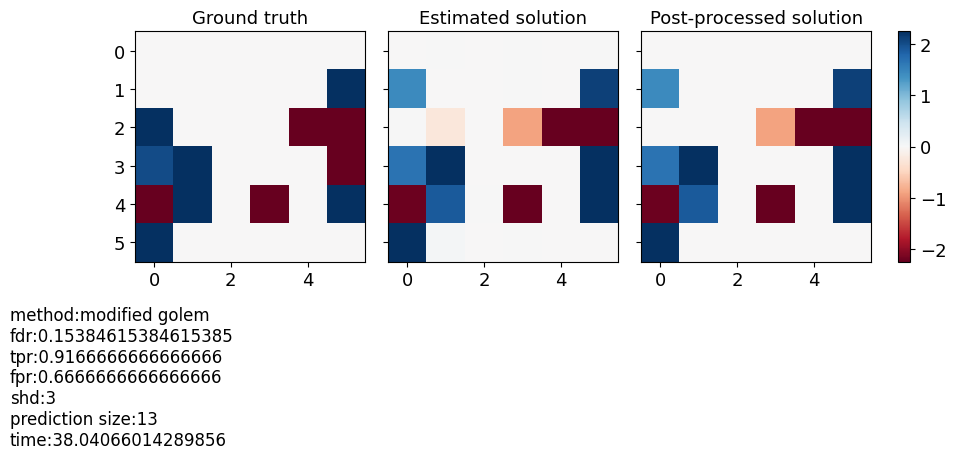

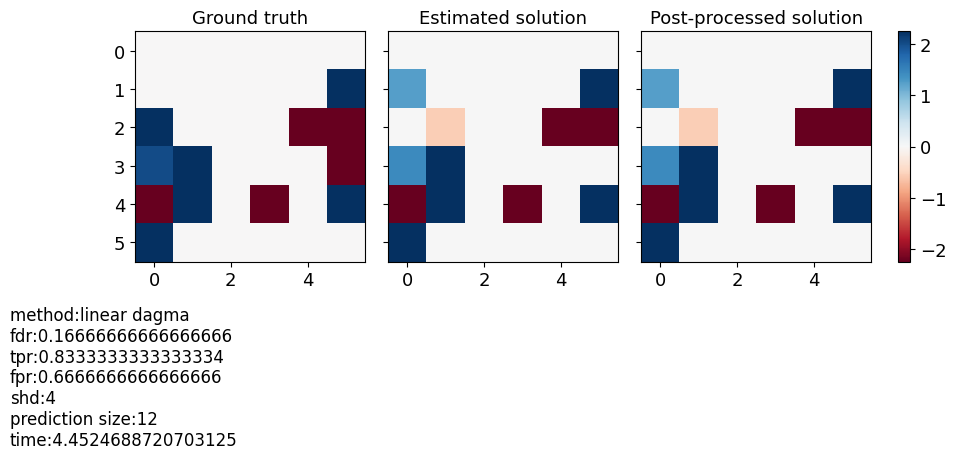

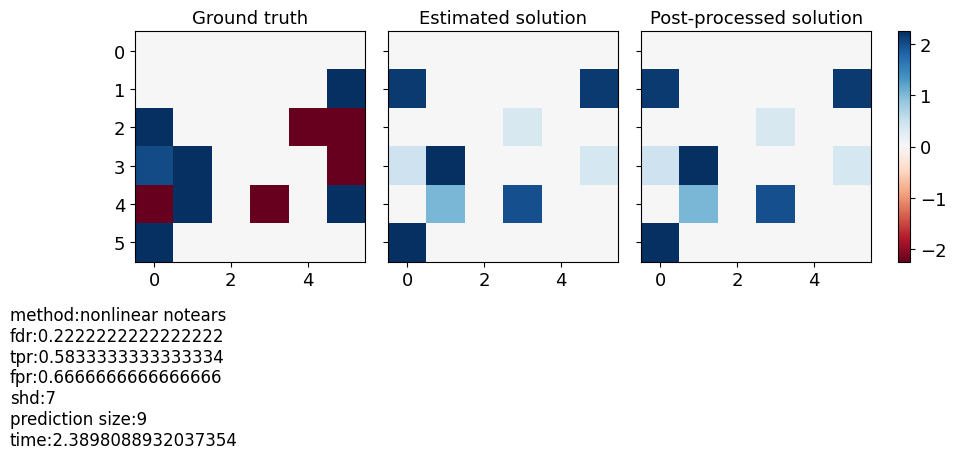

In [24]:
examples = 10
d = 6
degree = 3


dataset = SyntheticDataset(examples, d, 'ER', 
                           degree, 'gaussian_ev', 
                           3, seed)

compare(dataset, nonlinear=True, dims=[d,1],output_dir=output_dir,
        equal_variances = True,num_iter = 1e+5,learning_rate=1e-3)

start
original golem
modified golem


  0%|          | 0/180000.0 [00:00<?, ?it/s]

linear dagma


  0%|          | 0/230000.0 [00:00<?, ?it/s]

nonlinear dagma
linear notears
nonlinear notears


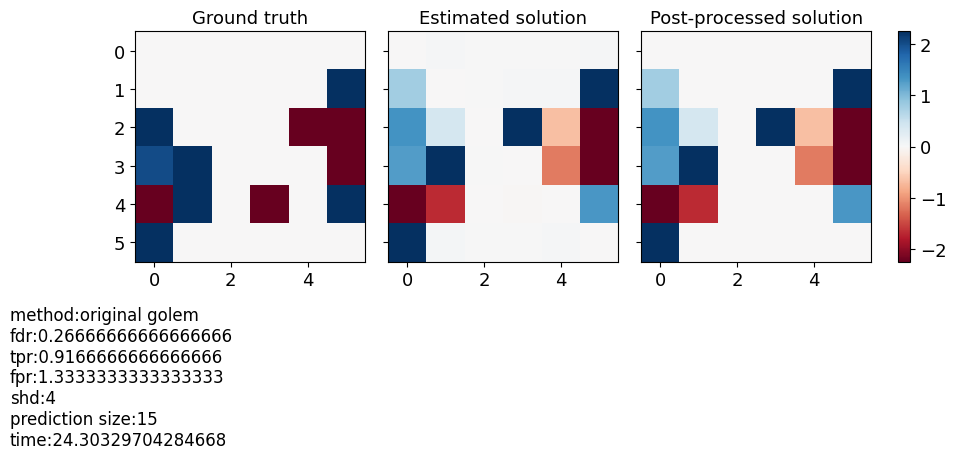

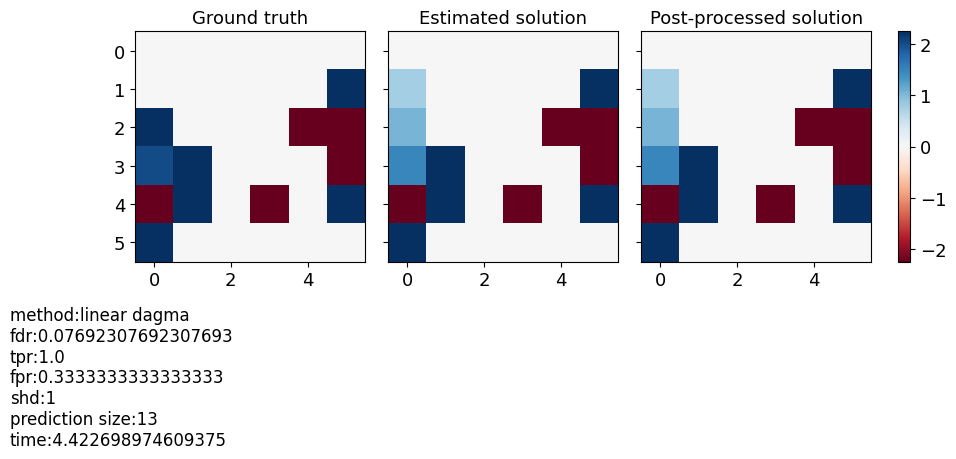

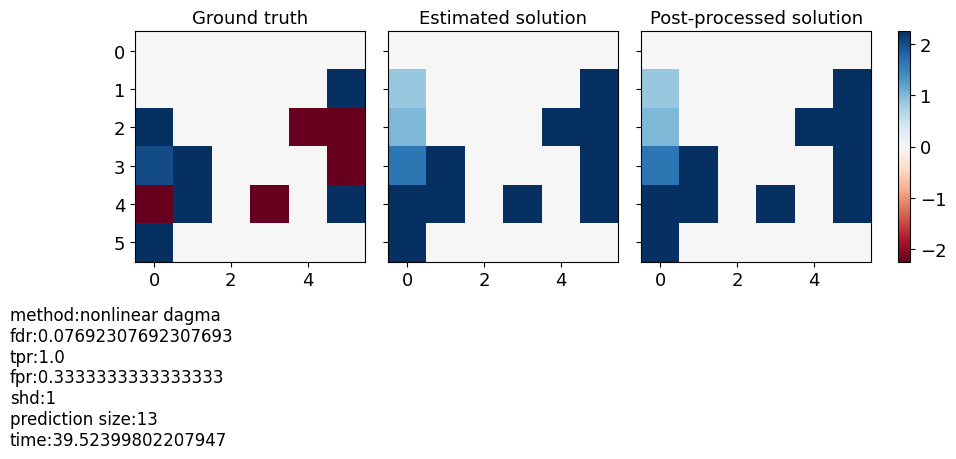

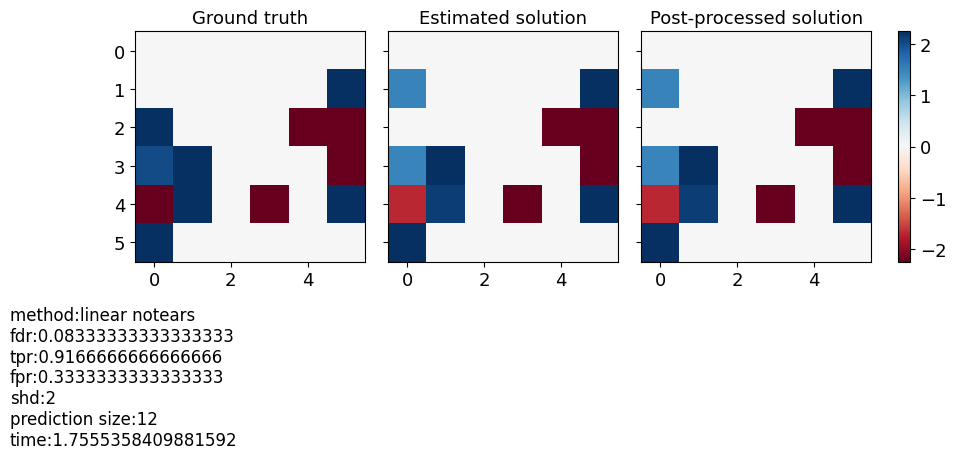

In [25]:
examples = 1000
d = 6
degree = 3


dataset = SyntheticDataset(examples, d, 'ER', 
                           degree, 'gaussian_ev', 
                           3, seed)
compare(dataset, nonlinear=True, dims=[d,1],output_dir=output_dir,
        equal_variances = True,num_iter = 1e+5,learning_rate=1e-3)

start
original golem
modified golem


  0%|          | 0/180000.0 [00:00<?, ?it/s]

linear dagma


  0%|          | 0/230000.0 [00:00<?, ?it/s]

nonlinear dagma
linear notears
nonlinear notears


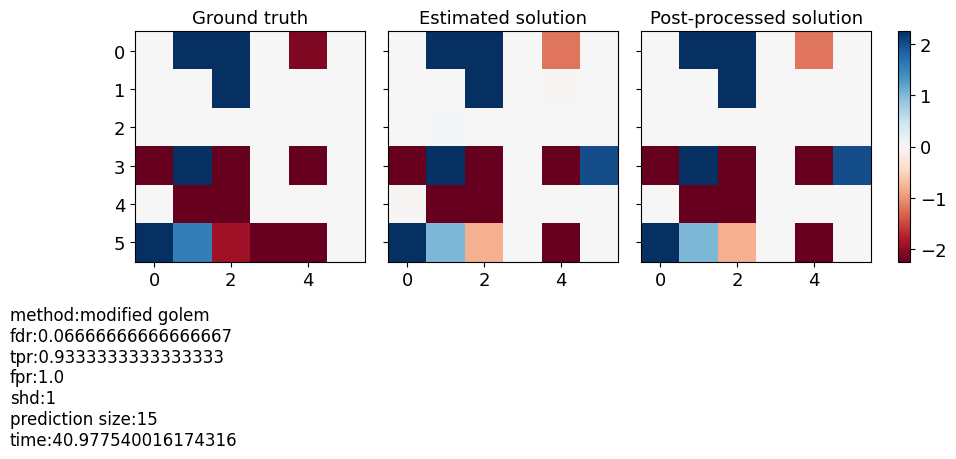

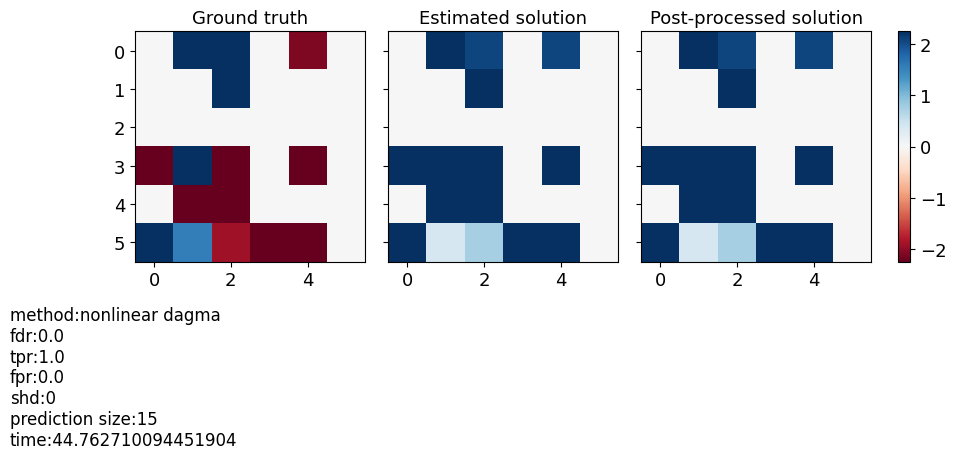

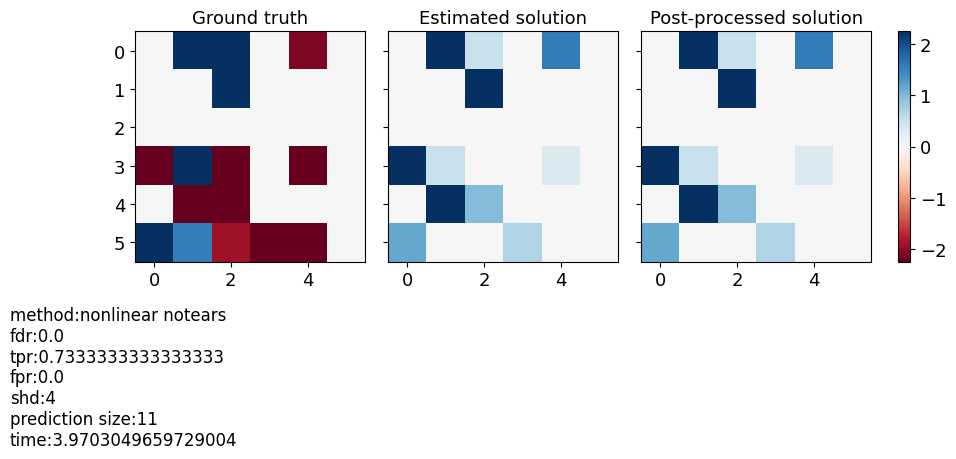

In [26]:
examples = 1000
d = 6
degree = 5


dataset = SyntheticDataset(examples, d, 'ER', 
                           degree, 'gaussian_ev', 
                           3, seed)
compare(dataset, nonlinear=True, dims=[d,1],output_dir=output_dir,
        equal_variances = True,num_iter = 1e+5,learning_rate=1e-3)

start
original golem
modified golem


  0%|          | 0/180000.0 [00:00<?, ?it/s]

linear dagma


  0%|          | 0/230000.0 [00:00<?, ?it/s]

nonlinear dagma
linear notears


overflow encountered in matmul


nonlinear notears


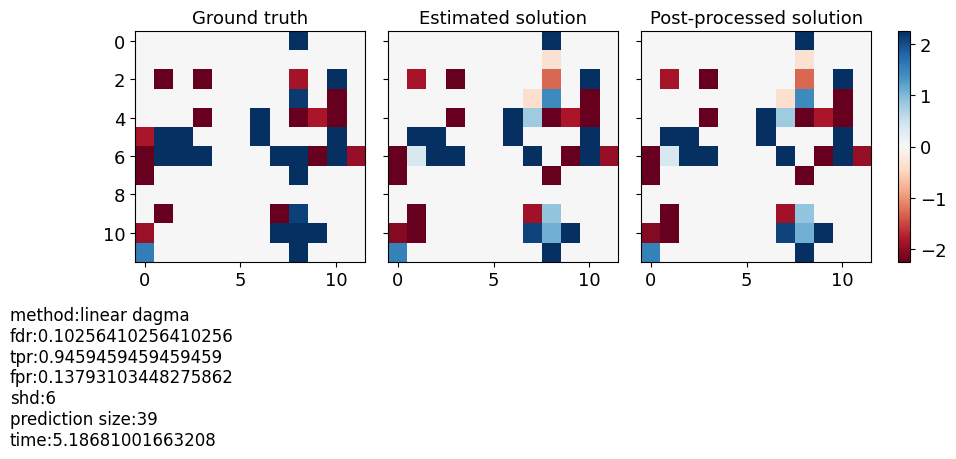

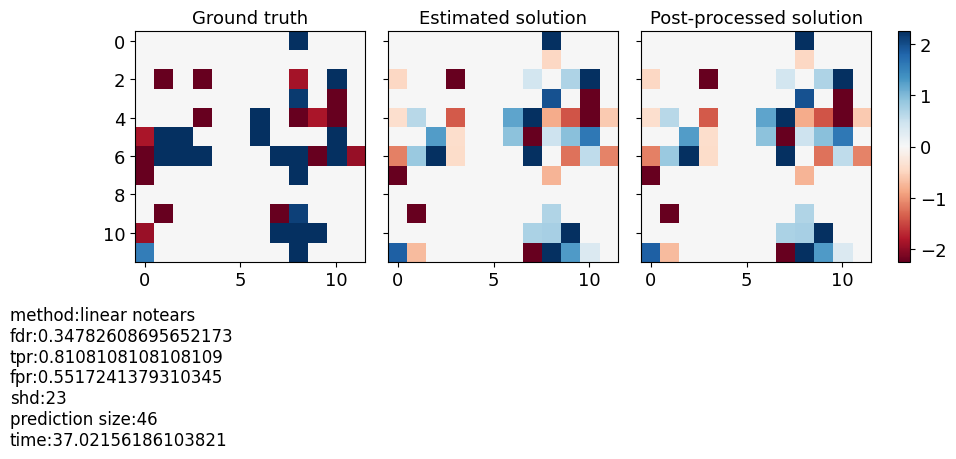

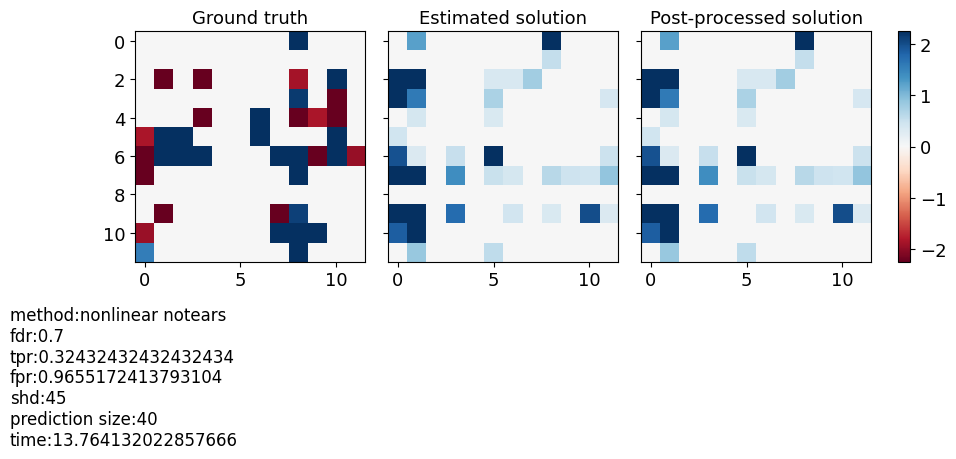

In [27]:
examples = 1000
d = 12
degree = 5


dataset = SyntheticDataset(examples, d, 'ER', 
                           degree, 'gaussian_ev', 
                           3, seed)
compare(dataset, nonlinear=True, dims=[d,3,1],output_dir=output_dir,
        equal_variances = True,num_iter = 1e+5,learning_rate=1e-3)

start
original golem
modified golem


  0%|          | 0/180000.0 [00:00<?, ?it/s]

linear dagma


  0%|          | 0/230000.0 [00:00<?, ?it/s]

nonlinear dagma
linear notears
nonlinear notears


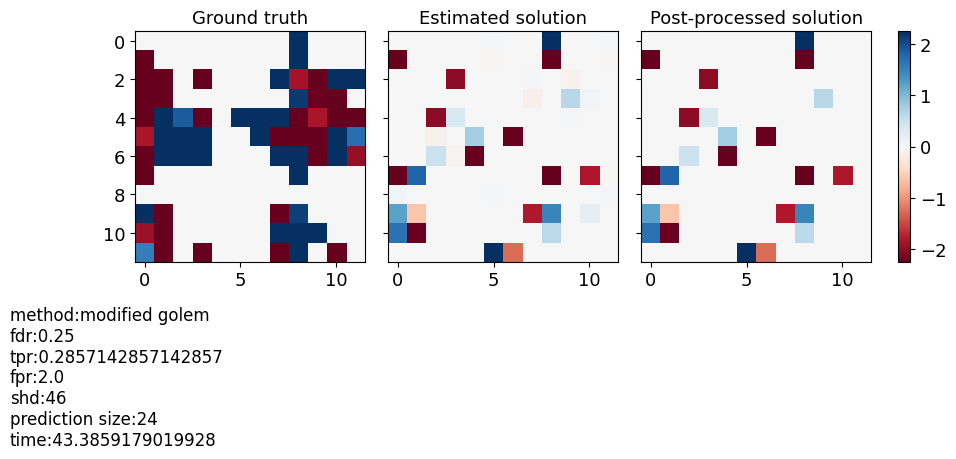

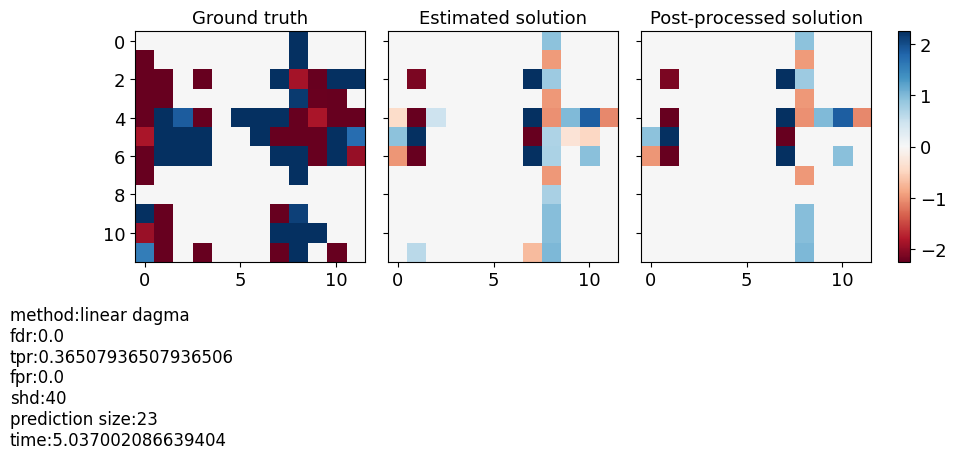

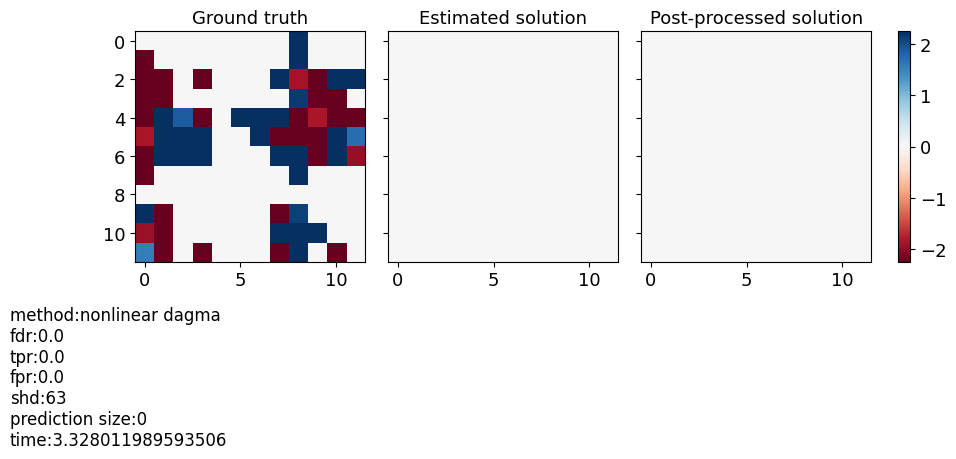

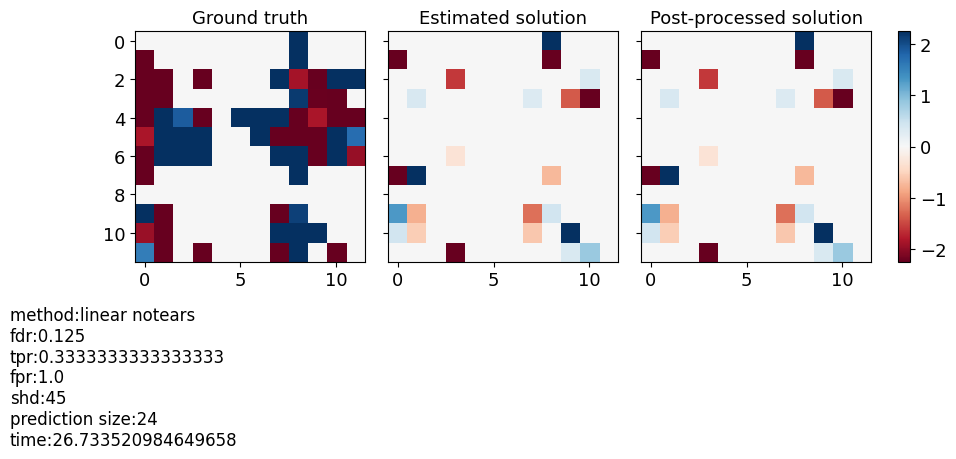

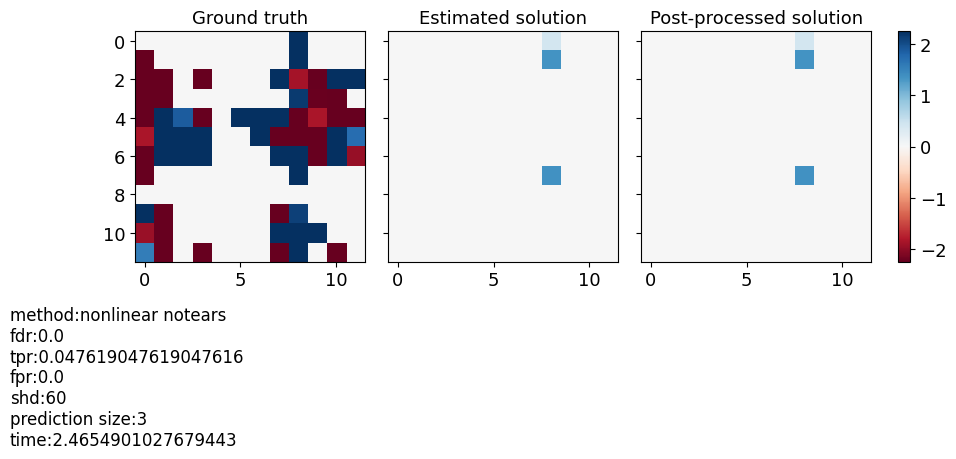

In [28]:
examples = 1000
d = 12
degree = 10


dataset = SyntheticDataset(examples, d, 'ER', 
                           degree, 'gaussian_ev', 
                           3, seed)
compare(dataset, nonlinear=True, dims=[d,3,1],output_dir=output_dir,
        equal_variances = True, num_iter = 1e+5,learning_rate=1e-3)

## Paper Replications

here we repicate the metrics of our 3 papers with synthetic datasets


In [27]:
examples = 1000
degree = 4
graph_type = 'ER'
noise_type = 'gaussian_ev'
seed=332

ds = [20, 30, 50, 80, 100]

datasets = [SyntheticDataset(n=examples,
                             d=i, 
                             graph_type=graph_type, 
                             degree=degree, 
                             noise_type=noise_type, 
                             B_scale=3, 
                             seed=seed)
            for i in ds]

In [28]:
[dataset.X.shape for dataset in datasets]

[(1000, 20), (1000, 30)]

In [ ]:
vals_golem = testMultipleMethods(lambda x: golem(x,.02,5.0,num_iter=100_000,
                                   equal_variances=True), datasets)

In [24]:
vals_golem

[{'fdr': 0.23529411764705882,
  'tpr': 1.0,
  'fpr': 0.5,
  'shd': 4,
  'pred_size': 17,
  'time': 116.54983568191528,
  'edges': -5.205140506378264}]

In [ ]:
golem_df = pd.DataFrame(vals_golem)
golem_df.to_csv('golem_results.csv')


In [ ]:
vals_notears = testMultipleMethods(lambda x: notears_linear(x, 0.05,'l2'), datasets)

In [ ]:
vals_notears

In [ ]:
notears_df = pd.DataFrame(vals_notears)
notears_df.to_csv('notears_results.csv')


In [4]:
vals = testMultipleMethods(lambda x: dagma_linear(x,.05), datasets)

NameError: name 'testMultipleMethods' is not defined

<Axes: xlabel='nodes', ylabel='Prediction Size'>

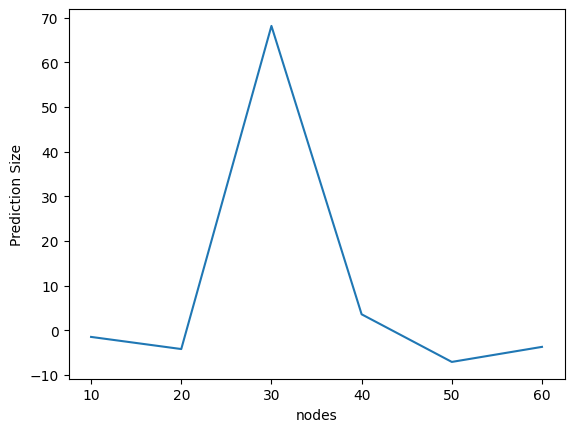

In [23]:
plotShd(vals, ds)
plt.show()
plotPreds(vals, ds)

  0%|          | 0/130000.0 [00:00<?, ?it/s]

  0%|          | 0/130000.0 [00:00<?, ?it/s]

  0%|          | 0/130000.0 [00:00<?, ?it/s]

  0%|          | 0/130000.0 [00:00<?, ?it/s]

  0%|          | 0/130000.0 [00:00<?, ?it/s]

  0%|          | 0/130000.0 [00:00<?, ?it/s]

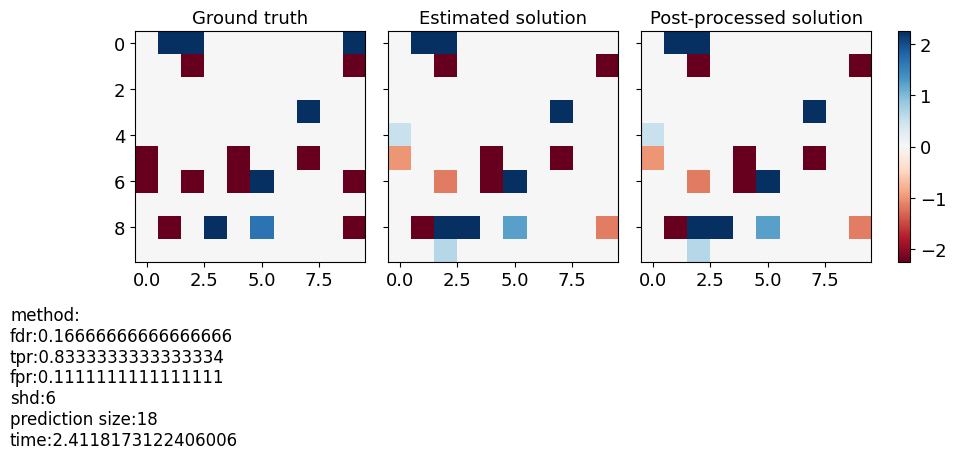

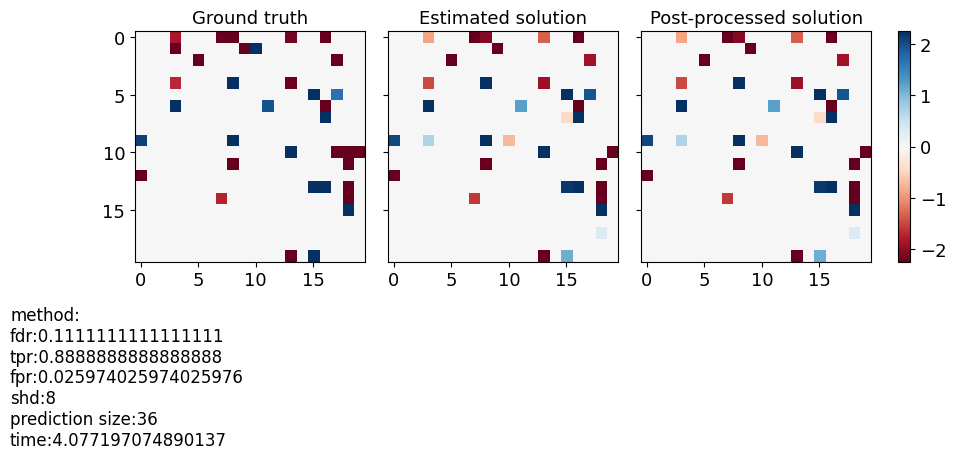

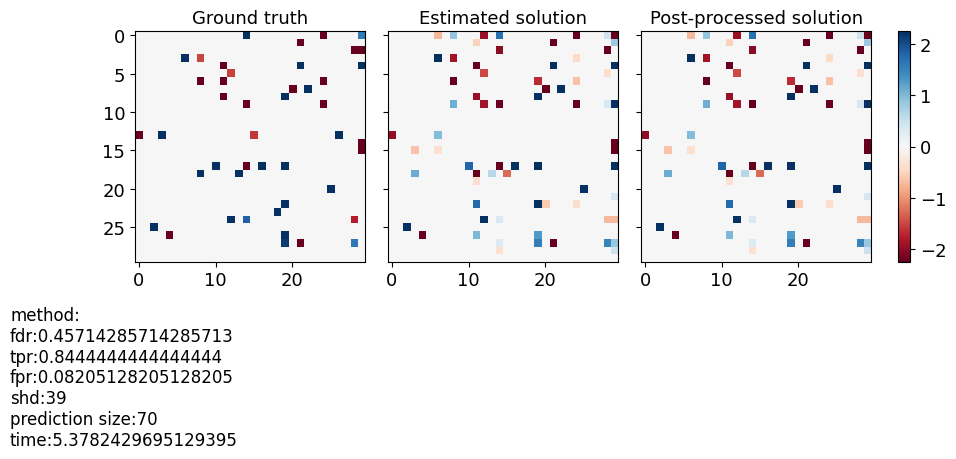

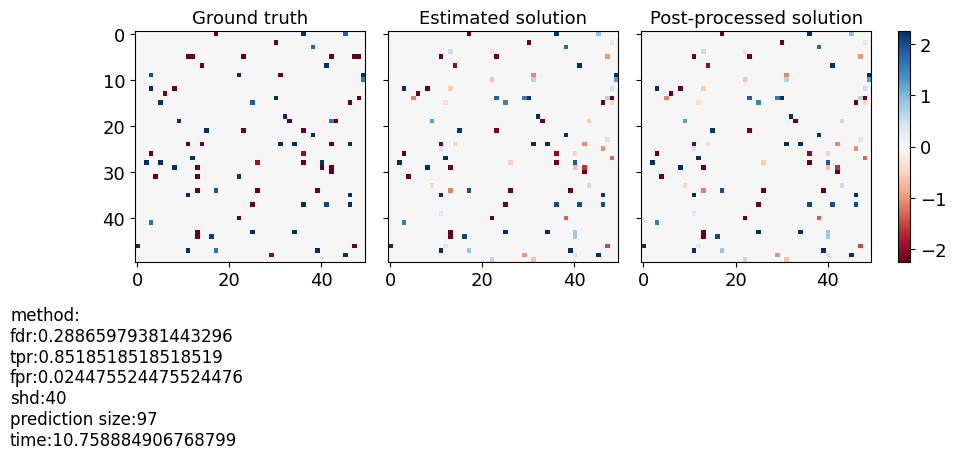

In [24]:
vals = testMultipleMethods(lambda x: dagma_linear(x,.3,loss_type='l2',max_iter=10000), datasets)

<Axes: xlabel='nodes', ylabel='Prediction Size'>

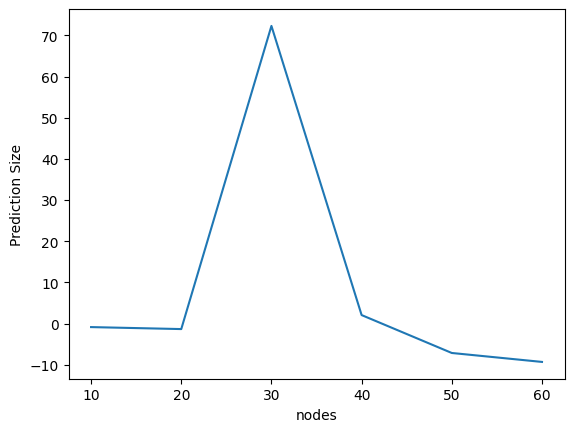

In [25]:
plotShd(vals, ds)
plt.show()
plotPreds(vals, ds)

KeyboardInterrupt: 

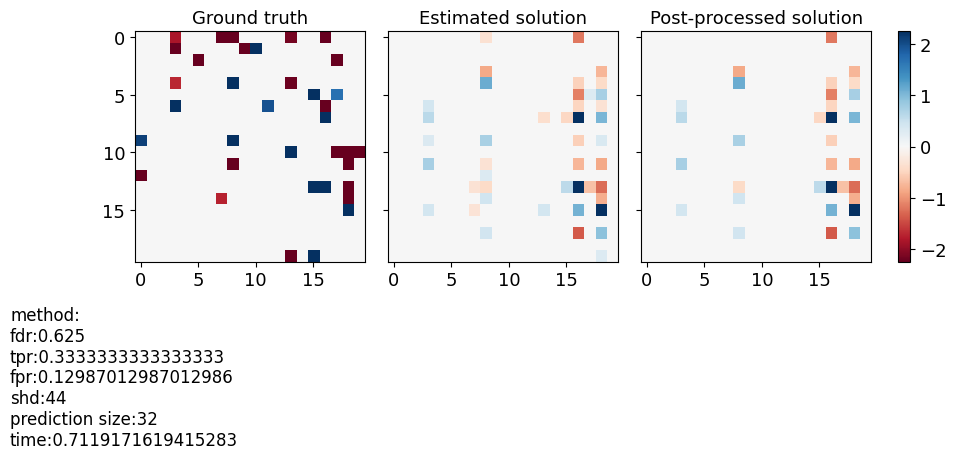

In [31]:
vals = testMultipleMethods(lambda x: notears_linear(x,.3,'l2',checkpoint=1,max_iter=1), datasets)

In [ ]:
plotShd(vals, ds)
plt.show()
plotPreds(vals, ds)

In [32]:
examples = 1000
d = 10
degree = 3
graph_type = 'ER'###
noise_type = 'gaussian_nv'
seed=332

examples = [examples*i for i in range(1, 11, 2)]

datasets = [SyntheticDataset(i, d, graph_type, 
                           degree, noise_type, 
                           3, seed=seed)
            for i in ds]

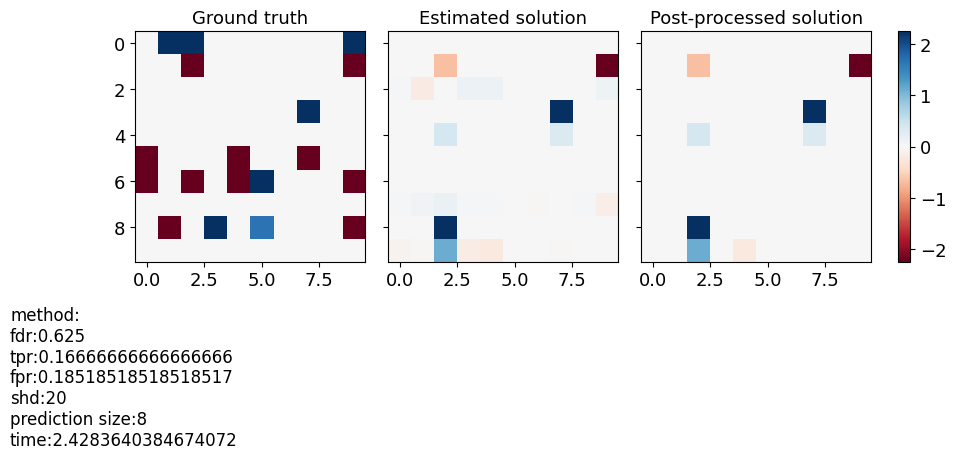

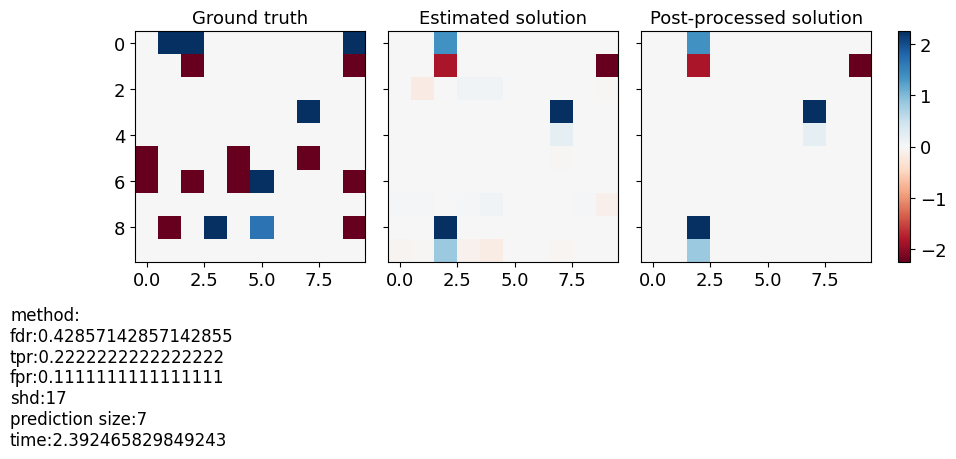

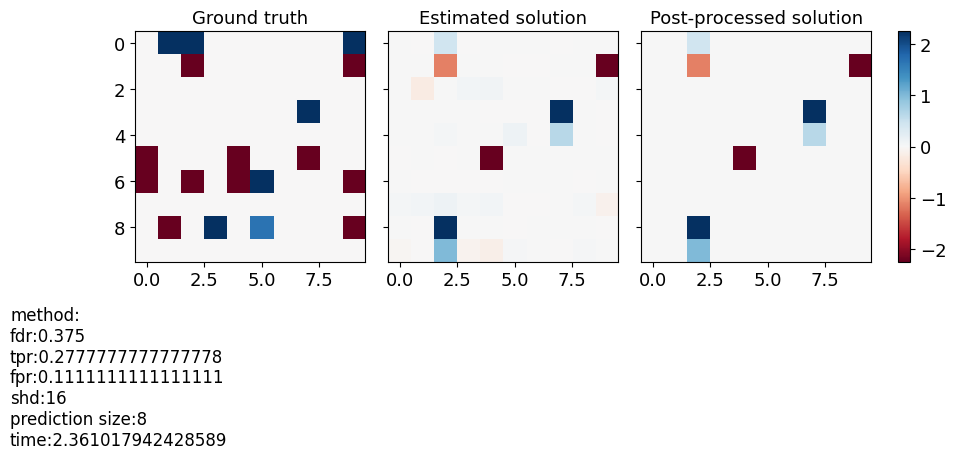

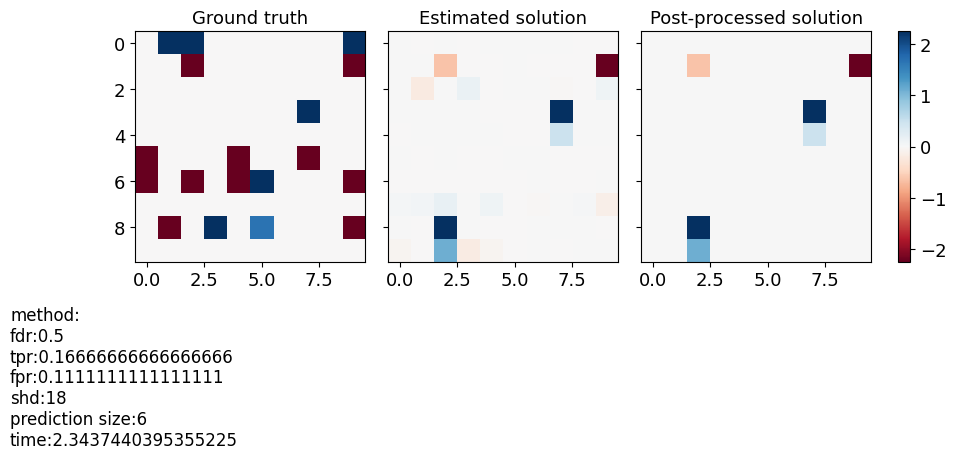

In [33]:
vals = testMultipleMethods(lambda x: golem(x,.3,.3,num_iter=10000,
                                   equal_variances=True), datasets)

<Axes: xlabel='nodes', ylabel='Prediction Size'>

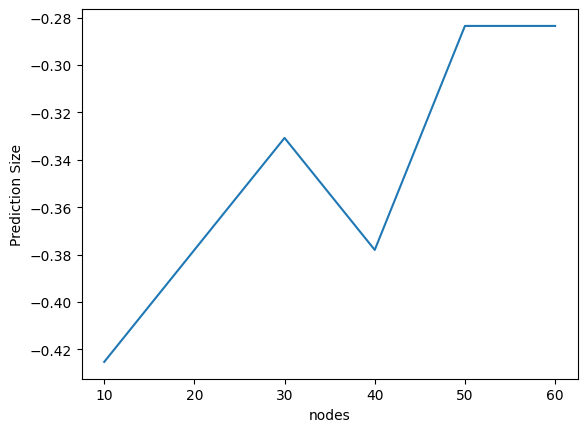

In [34]:
plotShd(vals, ds)
plt.show()
plotPreds(vals, ds)

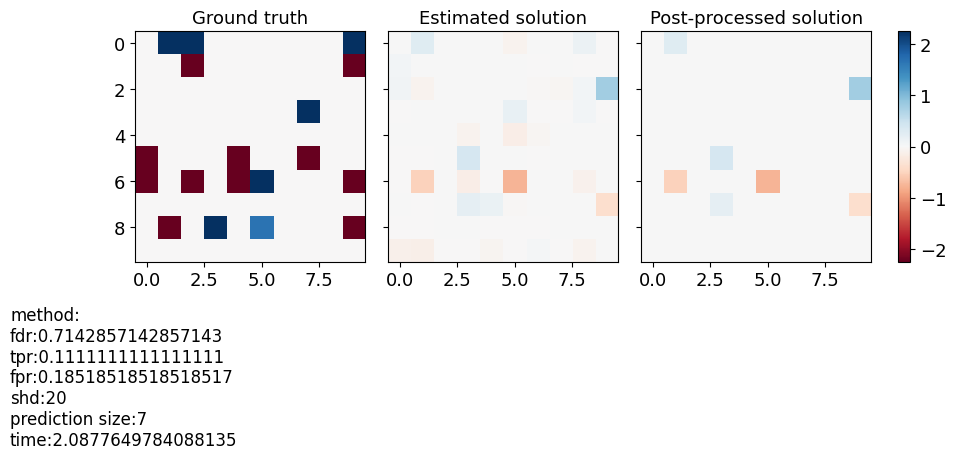

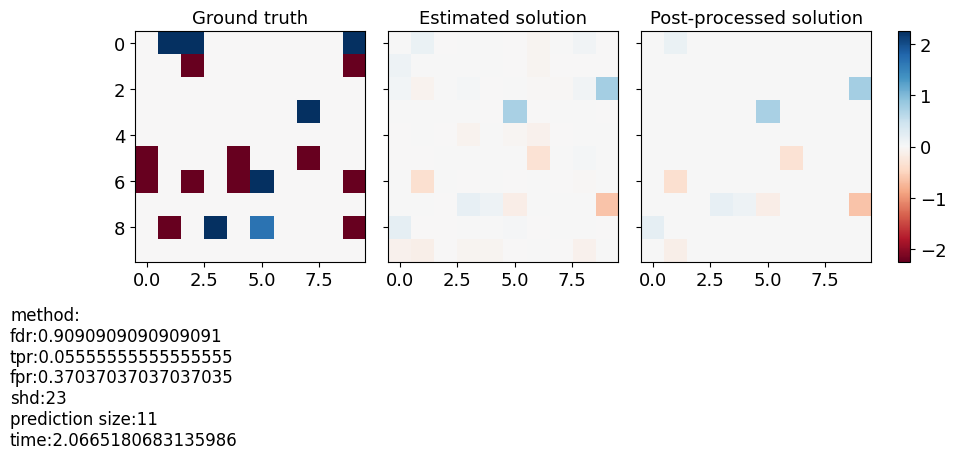

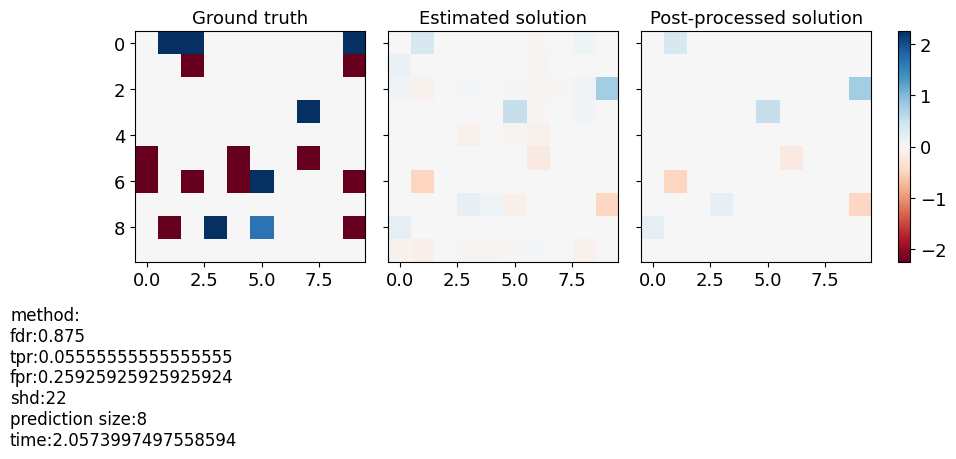

In [35]:
vals = testMultipleMethods(lambda x: golem(x,.3,.3,num_iter=10000,
                                   equal_variances=False), datasets)

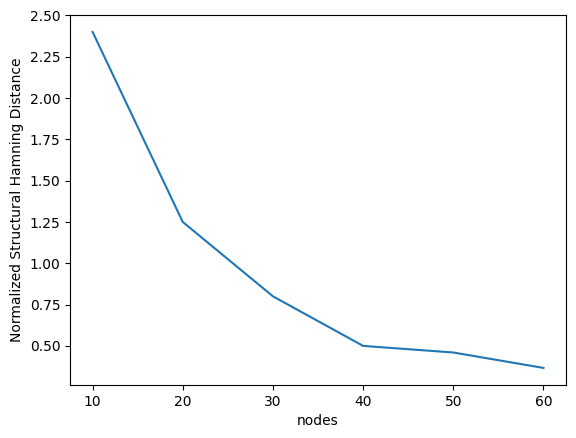

<Axes: xlabel='nodes', ylabel='Prediction Size'>

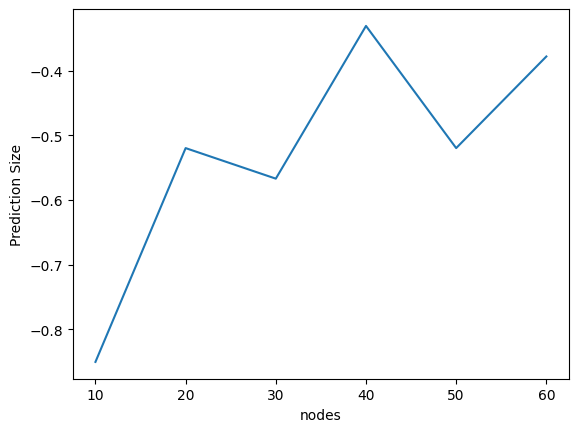

In [36]:
plotShd(vals, ds)
plt.show()
plotPreds(vals, ds)

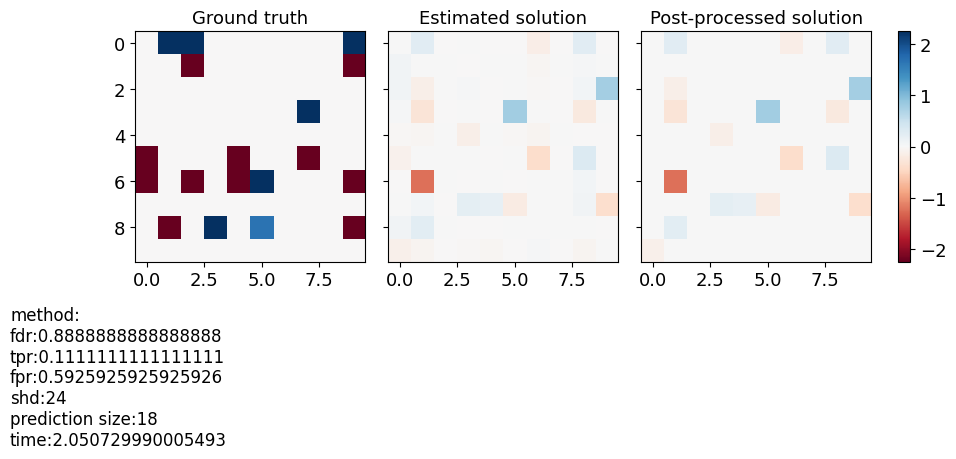

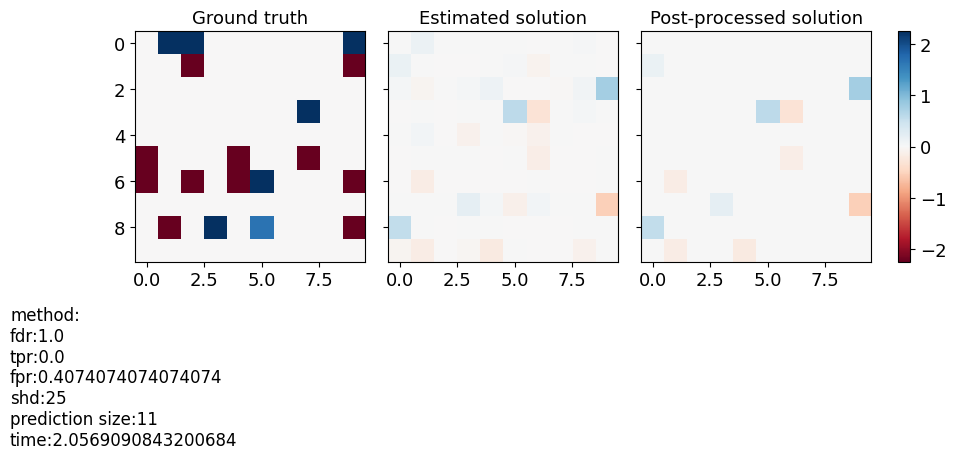

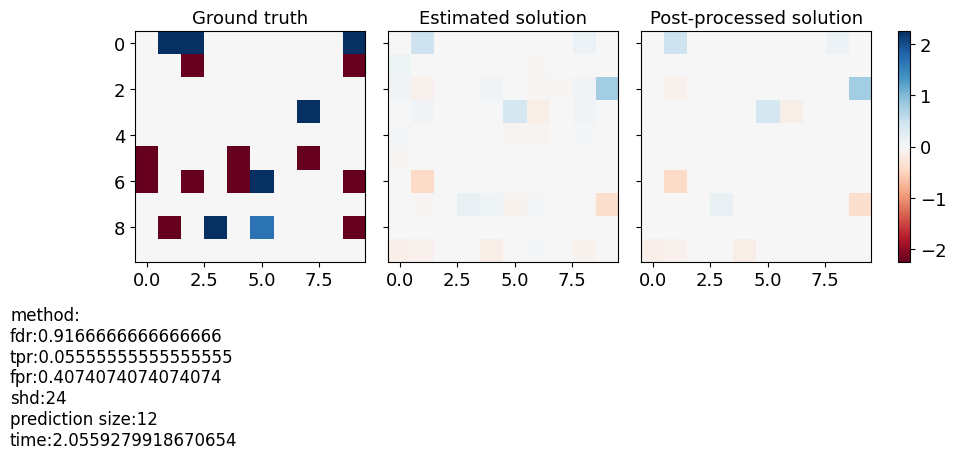

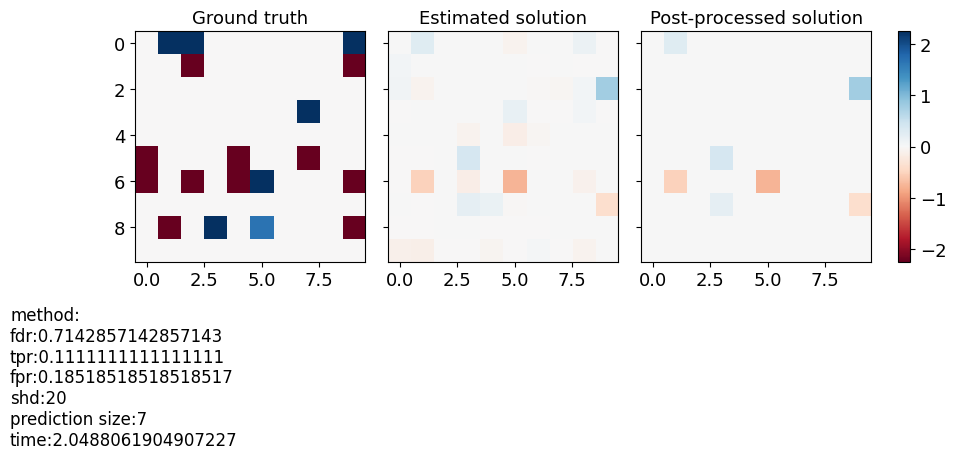

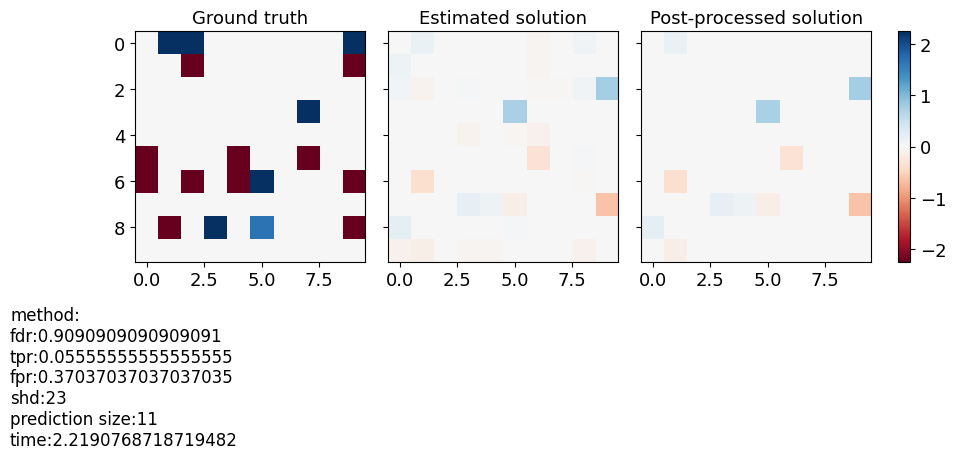

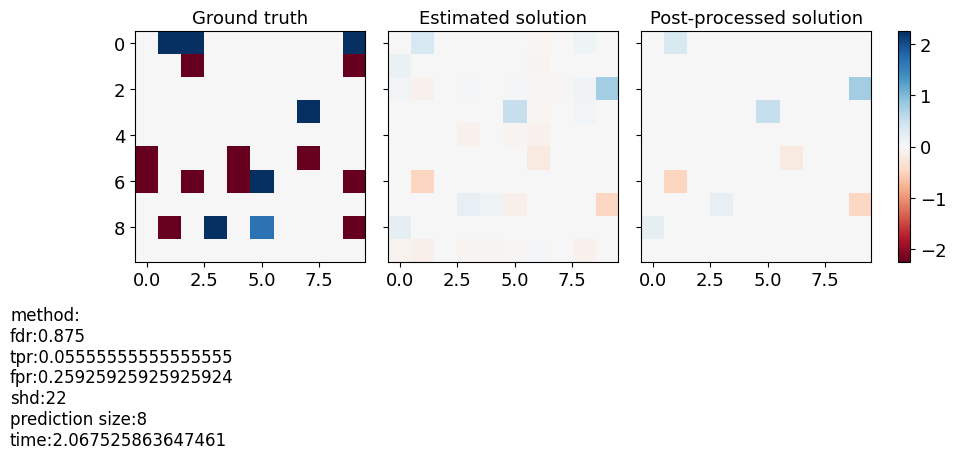

In [37]:
vals = testMultipleMethods(lambda x: golem(x,.3,.3,num_iter=10000,
                                   equal_variances=False), datasets)

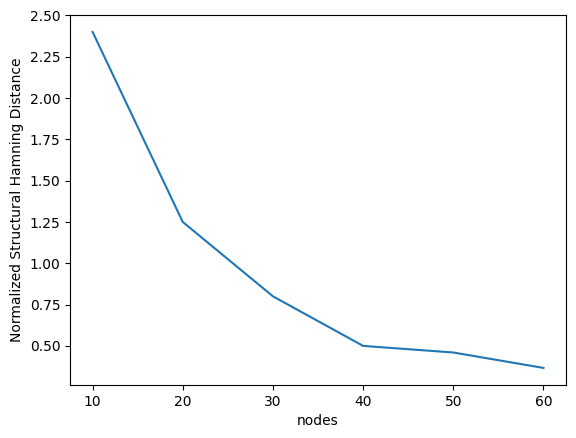

<Axes: xlabel='nodes', ylabel='Prediction Size'>

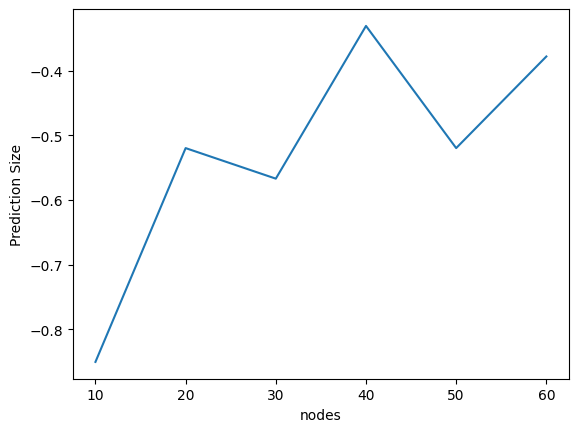

In [38]:
plotShd(vals, ds)
plt.show()
plotPreds(vals, ds)

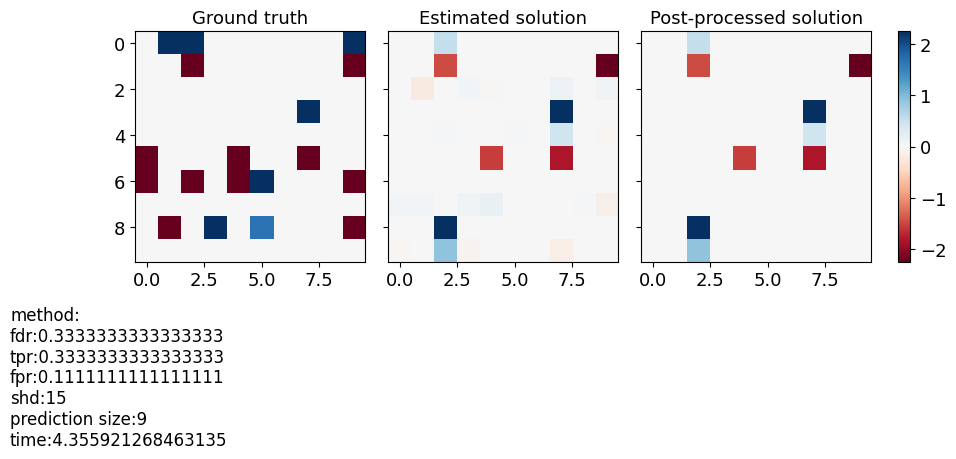

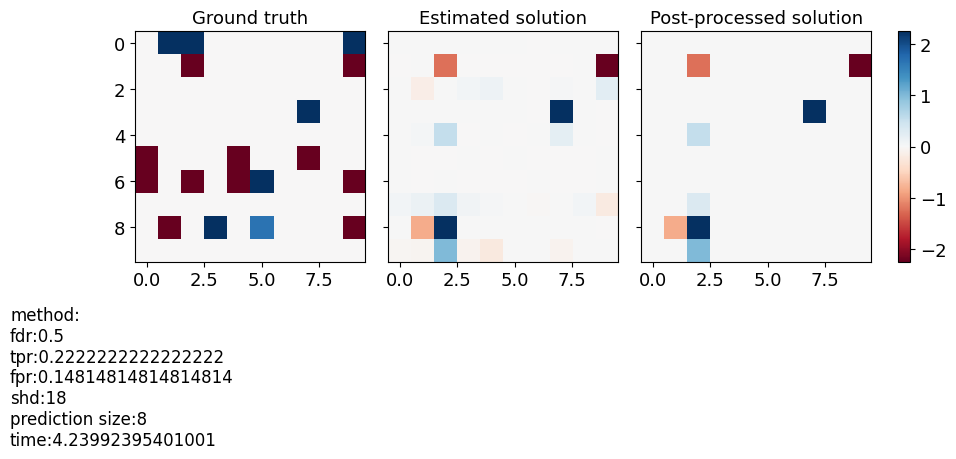

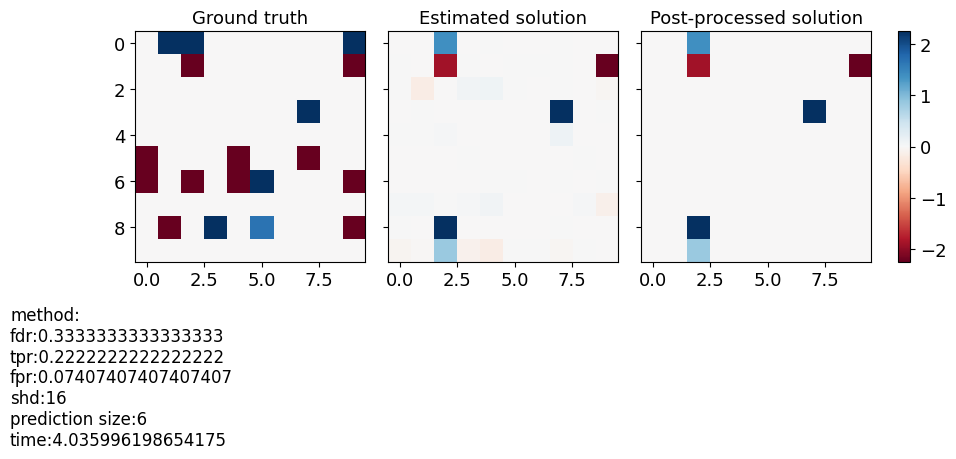

In [39]:
vals = testMultipleMethods(lambda x: golem_torch(x,.3,.3,num_iter=10000,
                                         equal_variances=True), datasets)

<Axes: xlabel='nodes', ylabel='Prediction Size'>

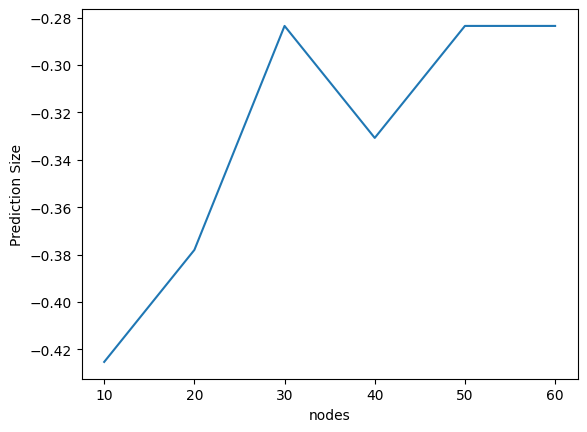

In [40]:
plotShd(vals, ds)
plt.show()
plotPreds(vals, ds)

  0%|          | 0/130000.0 [00:00<?, ?it/s]

  0%|          | 0/130000.0 [00:00<?, ?it/s]

  0%|          | 0/130000.0 [00:00<?, ?it/s]

  0%|          | 0/130000.0 [00:00<?, ?it/s]

  0%|          | 0/130000.0 [00:00<?, ?it/s]

  0%|          | 0/130000.0 [00:00<?, ?it/s]

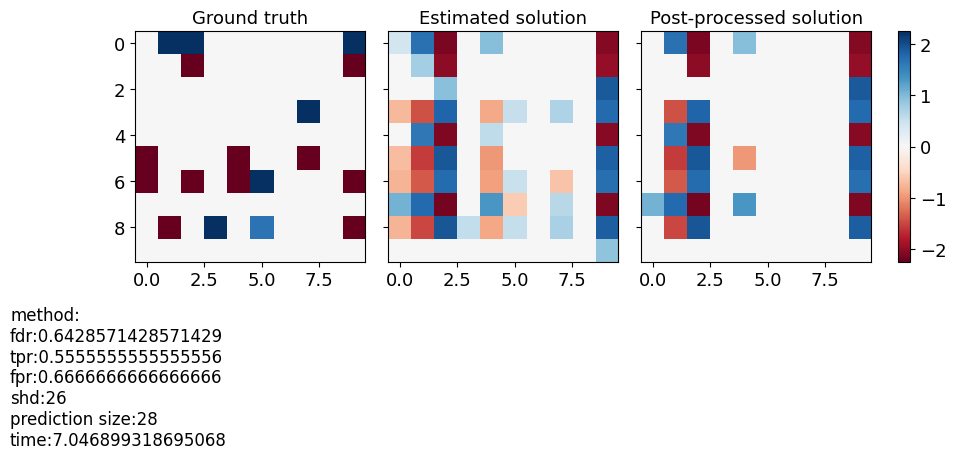

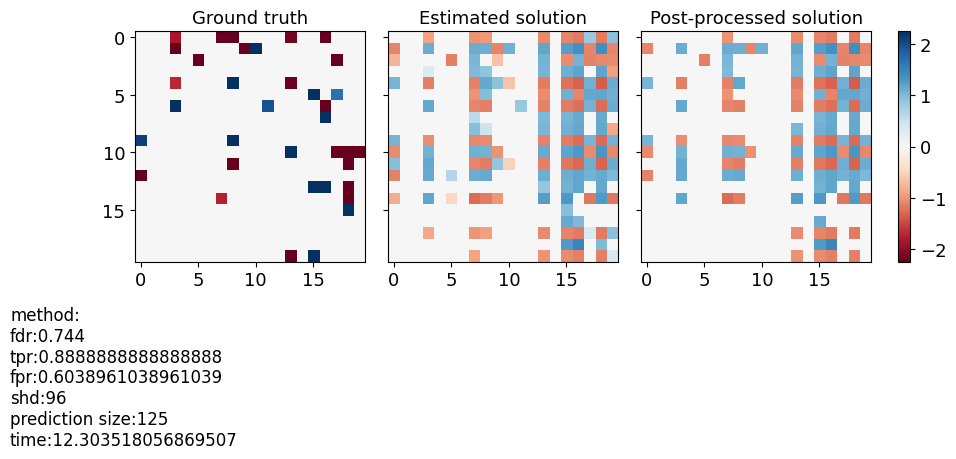

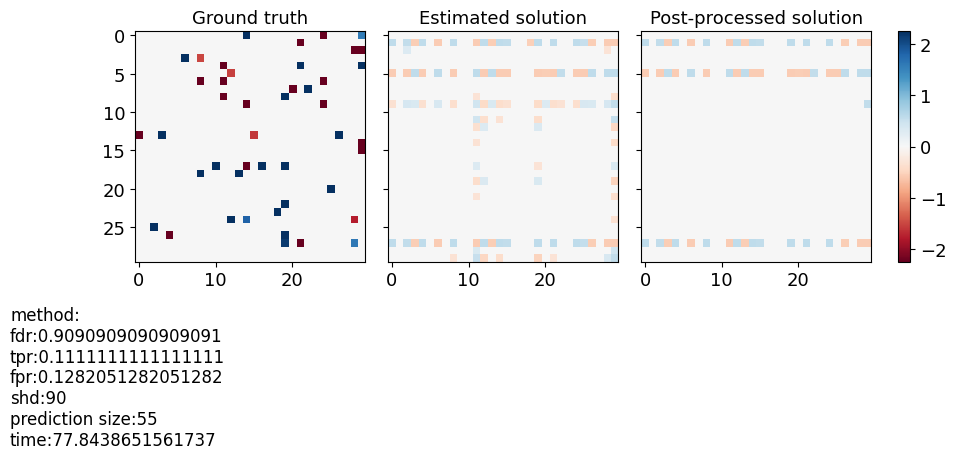

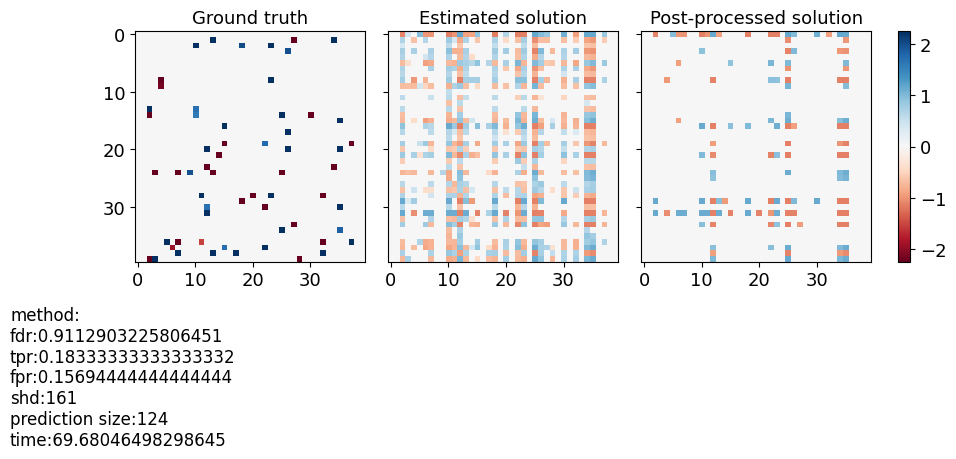

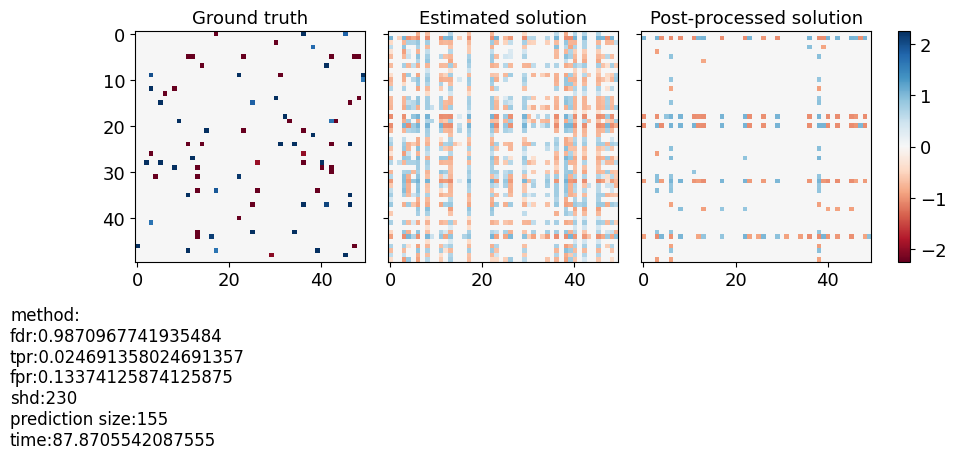

In [46]:
vals = testMultipleMethods(lambda x: dagma_linear(x,.3,loss_type='logistic',max_iter=10000), datasets)

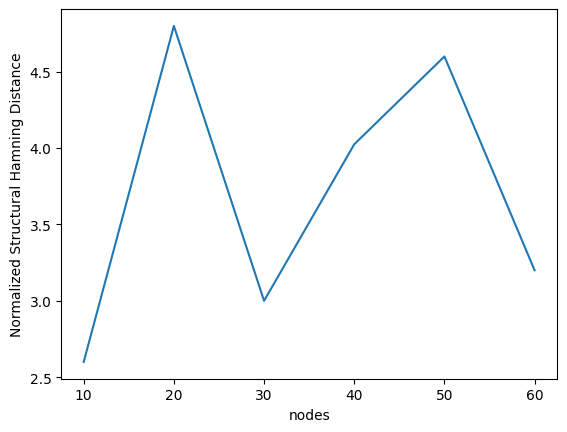

<Axes: xlabel='nodes', ylabel='Prediction Size'>

In [47]:
plotShd(vals, ds)
plt.show()
plotPreds(vals, ds)

In [ ]:
vals = testMultipleMethods(lambda x: dagma_linear(x,.3,loss_type='l2',max_iter=10000), datasets)

In [ ]:
plotShd(vals, ds)
plt.show()
plotPreds(vals, ds)

In [ ]:
vals = testMultipleMethods(lambda x: notears_linear(x,.3,'l2',checkpoint=100,max_iter=100), datasets)

In [ ]:
plotShd(vals, ds)
plt.show()
plotPreds(vals, ds)

## Sacks Dataset

The Sachs dataset is a dataset that measures the expression levels of various proteins and phospholipids in human cells and is widely used in causality studies.

We will examine the performence of our methods on this read world dataset, because of the data size we will not run notears or nonlinear dagma on it. This constrain further emphisizes the need for more efficiant methods we will explore in our second quarter project.

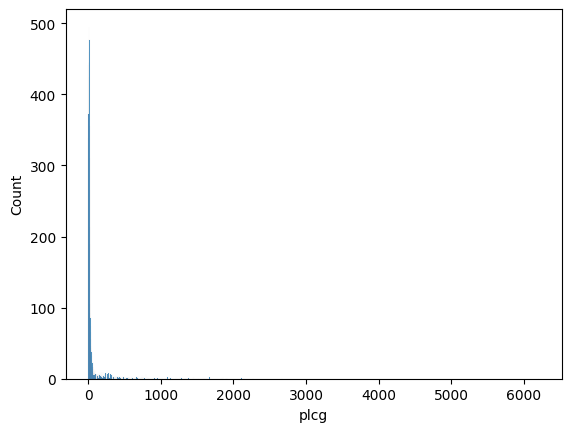

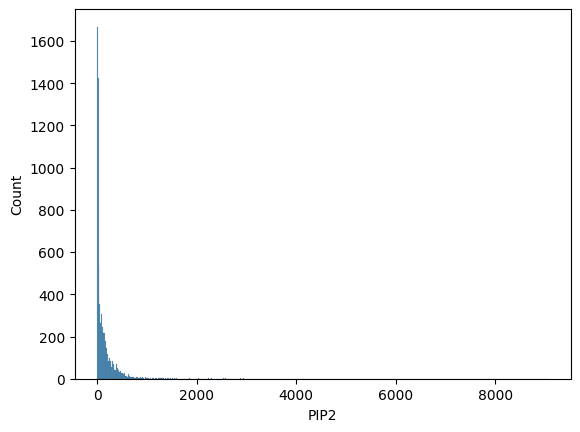

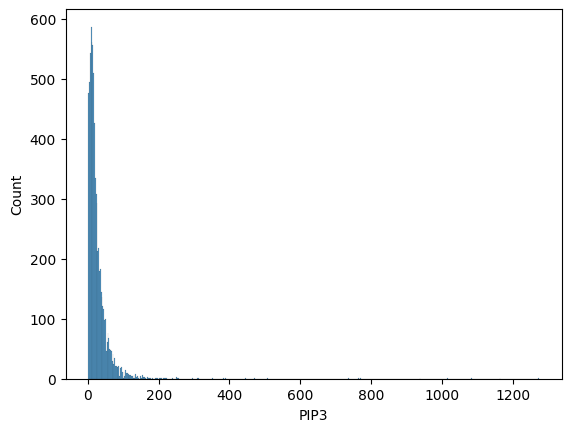

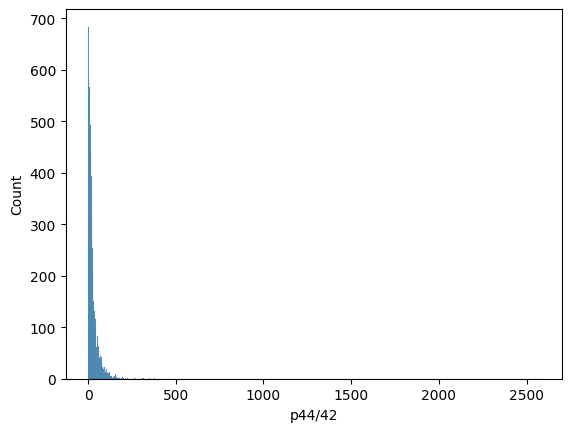

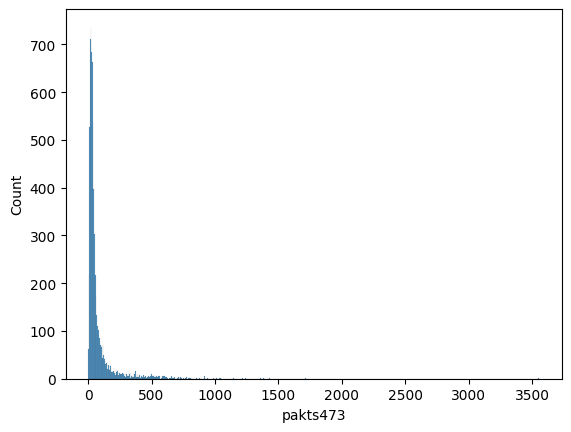

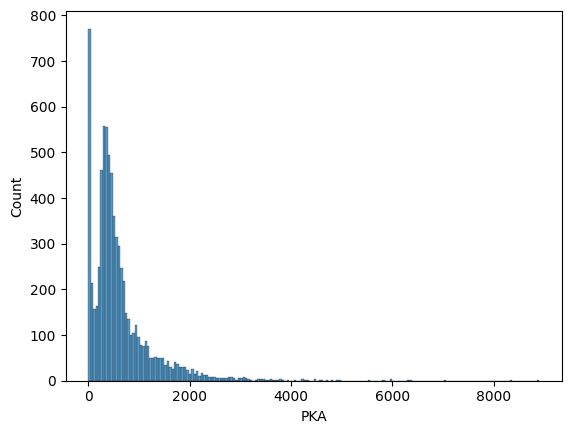

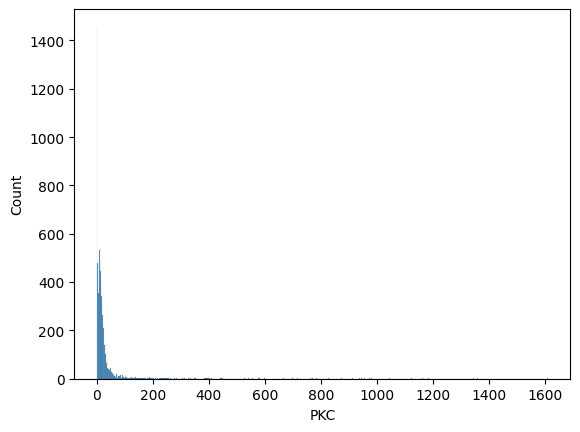

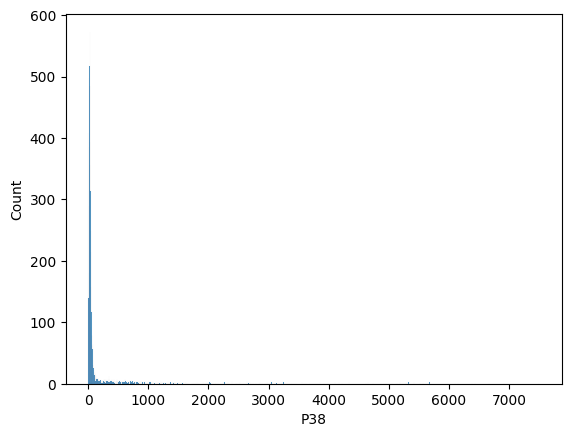

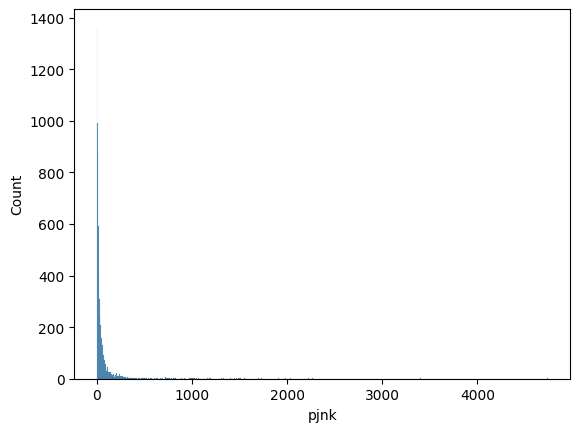

In [60]:

s_data, s_graph = cdt.data.load_dataset("sachs")

col_num = len(s_data.columns) 

for i in range(col_num):
    column = s_data[s_data.columns[i]]
    #plt.subplot(1,col_num,i+1)
    
    sns.histplot(column, label=s_data.columns[i])
    plt.show()


In [77]:
print('Sacks corrilations')
s_data.corr().style.background_gradient(cmap='coolwarm')

Sacks corrilations


In [78]:
df = pd.DataFrame(nx.adjacency_matrix(s_graph).todense(), index=s_data.columns, columns=s_data.columns)

df.style.background_gradient(cmap='coolwarm')

start
original golem
modified golem


  0%|          | 0/180000.0 [00:00<?, ?it/s]

linear dagma


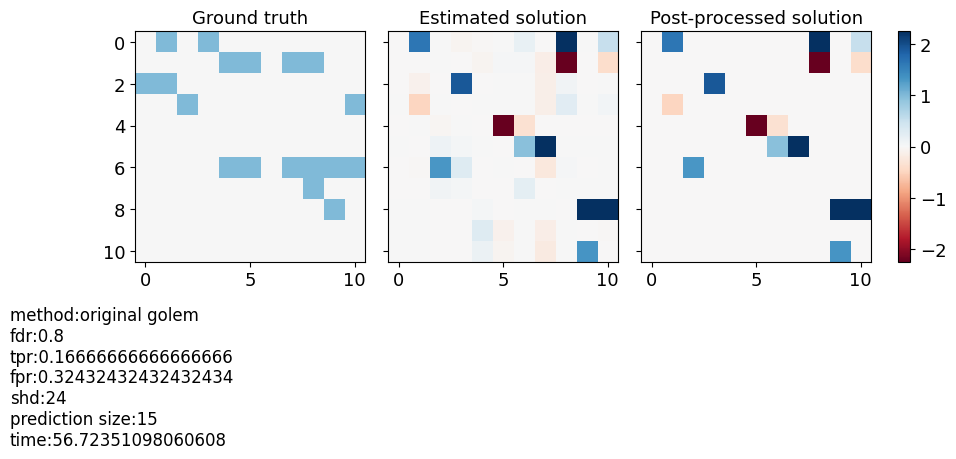

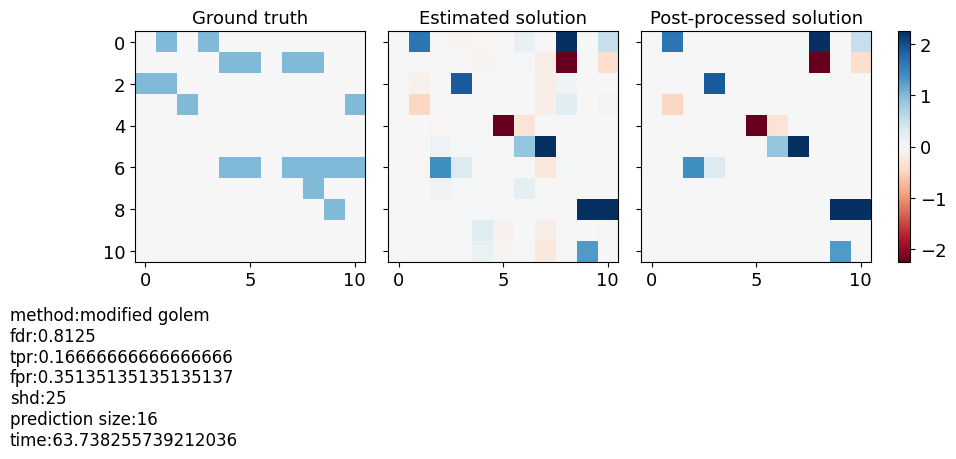

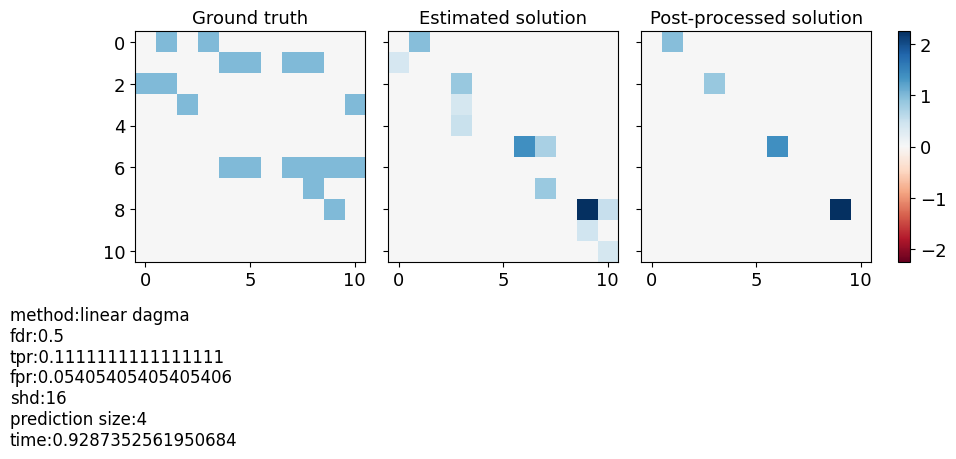

In [59]:
dataset = getSacksDataset()
compare(dataset, output_dir=output_dir, notears=False)

## Loss Analysis for early stopping threashold

We graph how our algorithems perform over their iterations. By looking at when and how training and validation performance diverge we can identify good candiates for early stopping thresholds

In [83]:
!python3 main.py  --method GOLEM_TORCH \
                     --seed 1 \
                     --d 10 \
                     --graph_type ER \
                     --degree 4 \
                     --noise_type gaussian_nv \
                     --equal_variances \
                     --lambda_1 2e-2 \
                     --lambda_2 5.0 \
                     --checkpoint_iter 5000

No GPU automatically detected. Setting SETTINGS.GPU to 0, and SETTINGS.NJOBS to cpu_count.
2023-12-10 15:22:50,295 INFO - __main__ - Finished setting up the logger.
2023-12-10 15:22:50,296 INFO - __main__ - Finished loading the dataset.
2023-12-10 15:22:50,519 INFO - src.trainers.golem_trainer_torch - Started training for 100000.0 iterations.
2023-12-10 15:22:50,520 INFO - src.trainers.golem_trainer_torch - TRAINING: [Iter 0] score 6.661E+01, likelihood 6.661E+01, h 0.000E+00
2023-12-10 15:22:50,520 INFO - src.trainers.golem_trainer_torch - VALIDATION: [Iter 0] score 5.544E+01, likelihood 5.544E+01, h 0.000E+00
2023-12-10 15:22:52,863 INFO - src.trainers.golem_trainer_torch - TRAINING: [Iter 5000] score 4.998E+01, likelihood 4.937E+01, h 6.680E-03
2023-12-10 15:22:52,863 INFO - src.trainers.golem_trainer_torch - VALIDATION: [Iter 5000] score 3.869E+01, likelihood 3.808E+01, h 6.641E-03
2023-12-10 15:22:55,178 INFO - src.trainers.golem_trainer_torch - TRAINING: [Iter 10000] score 4.998E

In [101]:

path = '{}/scores.csv'.format(sorted(glob('{}/*'.format('output')))[-1])

df = pd.read_csv(path)
df = df[2:]
df.head()


i      train        val
2  10000  49.980270  38.688350
3  15000  49.980250  38.688410
4  20000  49.980267  38.687855
5  25000  49.980278  38.687874
6  30000  49.980297  38.687870

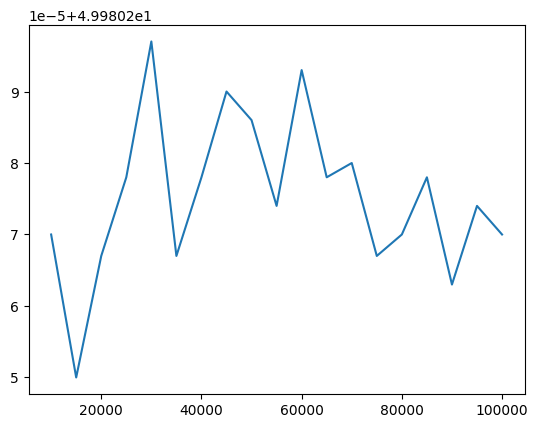

In [102]:
plt.plot(df['i'], df['train'], label='train')
plt.show()

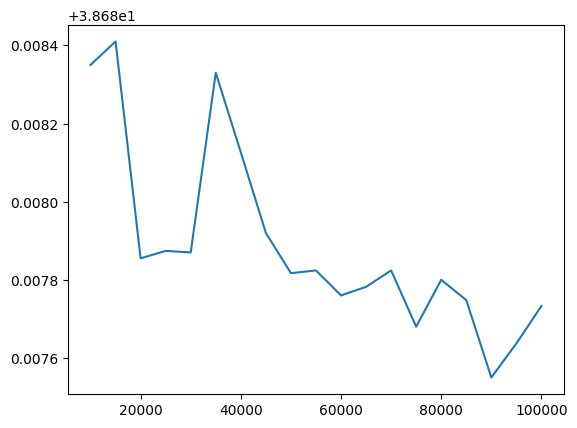

In [104]:
plt.plot(df['i'], df['val'], label='validate')
plt.show()

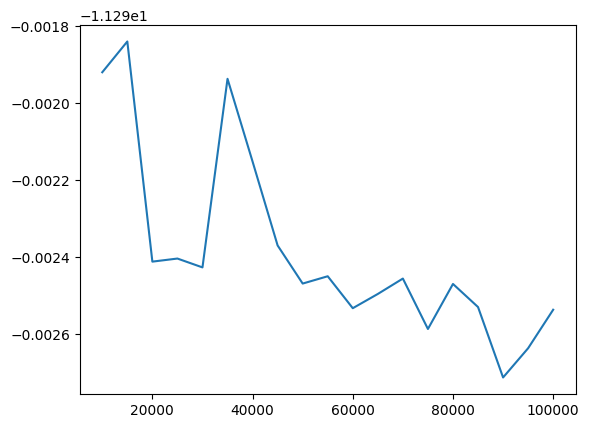

In [105]:
plt.plot(df['i'], df['val'] - df['train'])
plt.show()


In [106]:
# optimal early stopping threshold:
1e-4

0.0001